In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os
plt.style.use('publication')
import matplotlib.path as mpath
import matplotlib.patches as mpatches

Duplicate key in file PosixPath('/home/andrea/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/stylelib/publication.mplstyle'), line 52 ('legend.numpoints     : 1      # the number of points in the legend line')
Duplicate key in file PosixPath('/home/andrea/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/stylelib/publication.mplstyle'), line 53 ('legend.fontsize      : large')
Duplicate key in file PosixPath('/home/andrea/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/stylelib/publication.mplstyle'), line 66 ('legend.scatterpoints : 1 # number of scatter points')
/home/andrea/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12146/1550184710.py:16: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(L-x, [S(i, a) for i in x], label = f'$\sigma  = {a:.2f}$', color = color, lw = .5)
/tmp/ipykernel_12146/1550184710.py:27: SyntaxWarning: invalid escape sequence '\s'
  fig.text(0.53,.91, '$\sigma$', ha = 'center', va = 'center', fontsize = 8)
/tmp/ipykernel_12146/1550184710.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f"{a:.2f}" for a in a_list[:-1]], fontsize = 6)


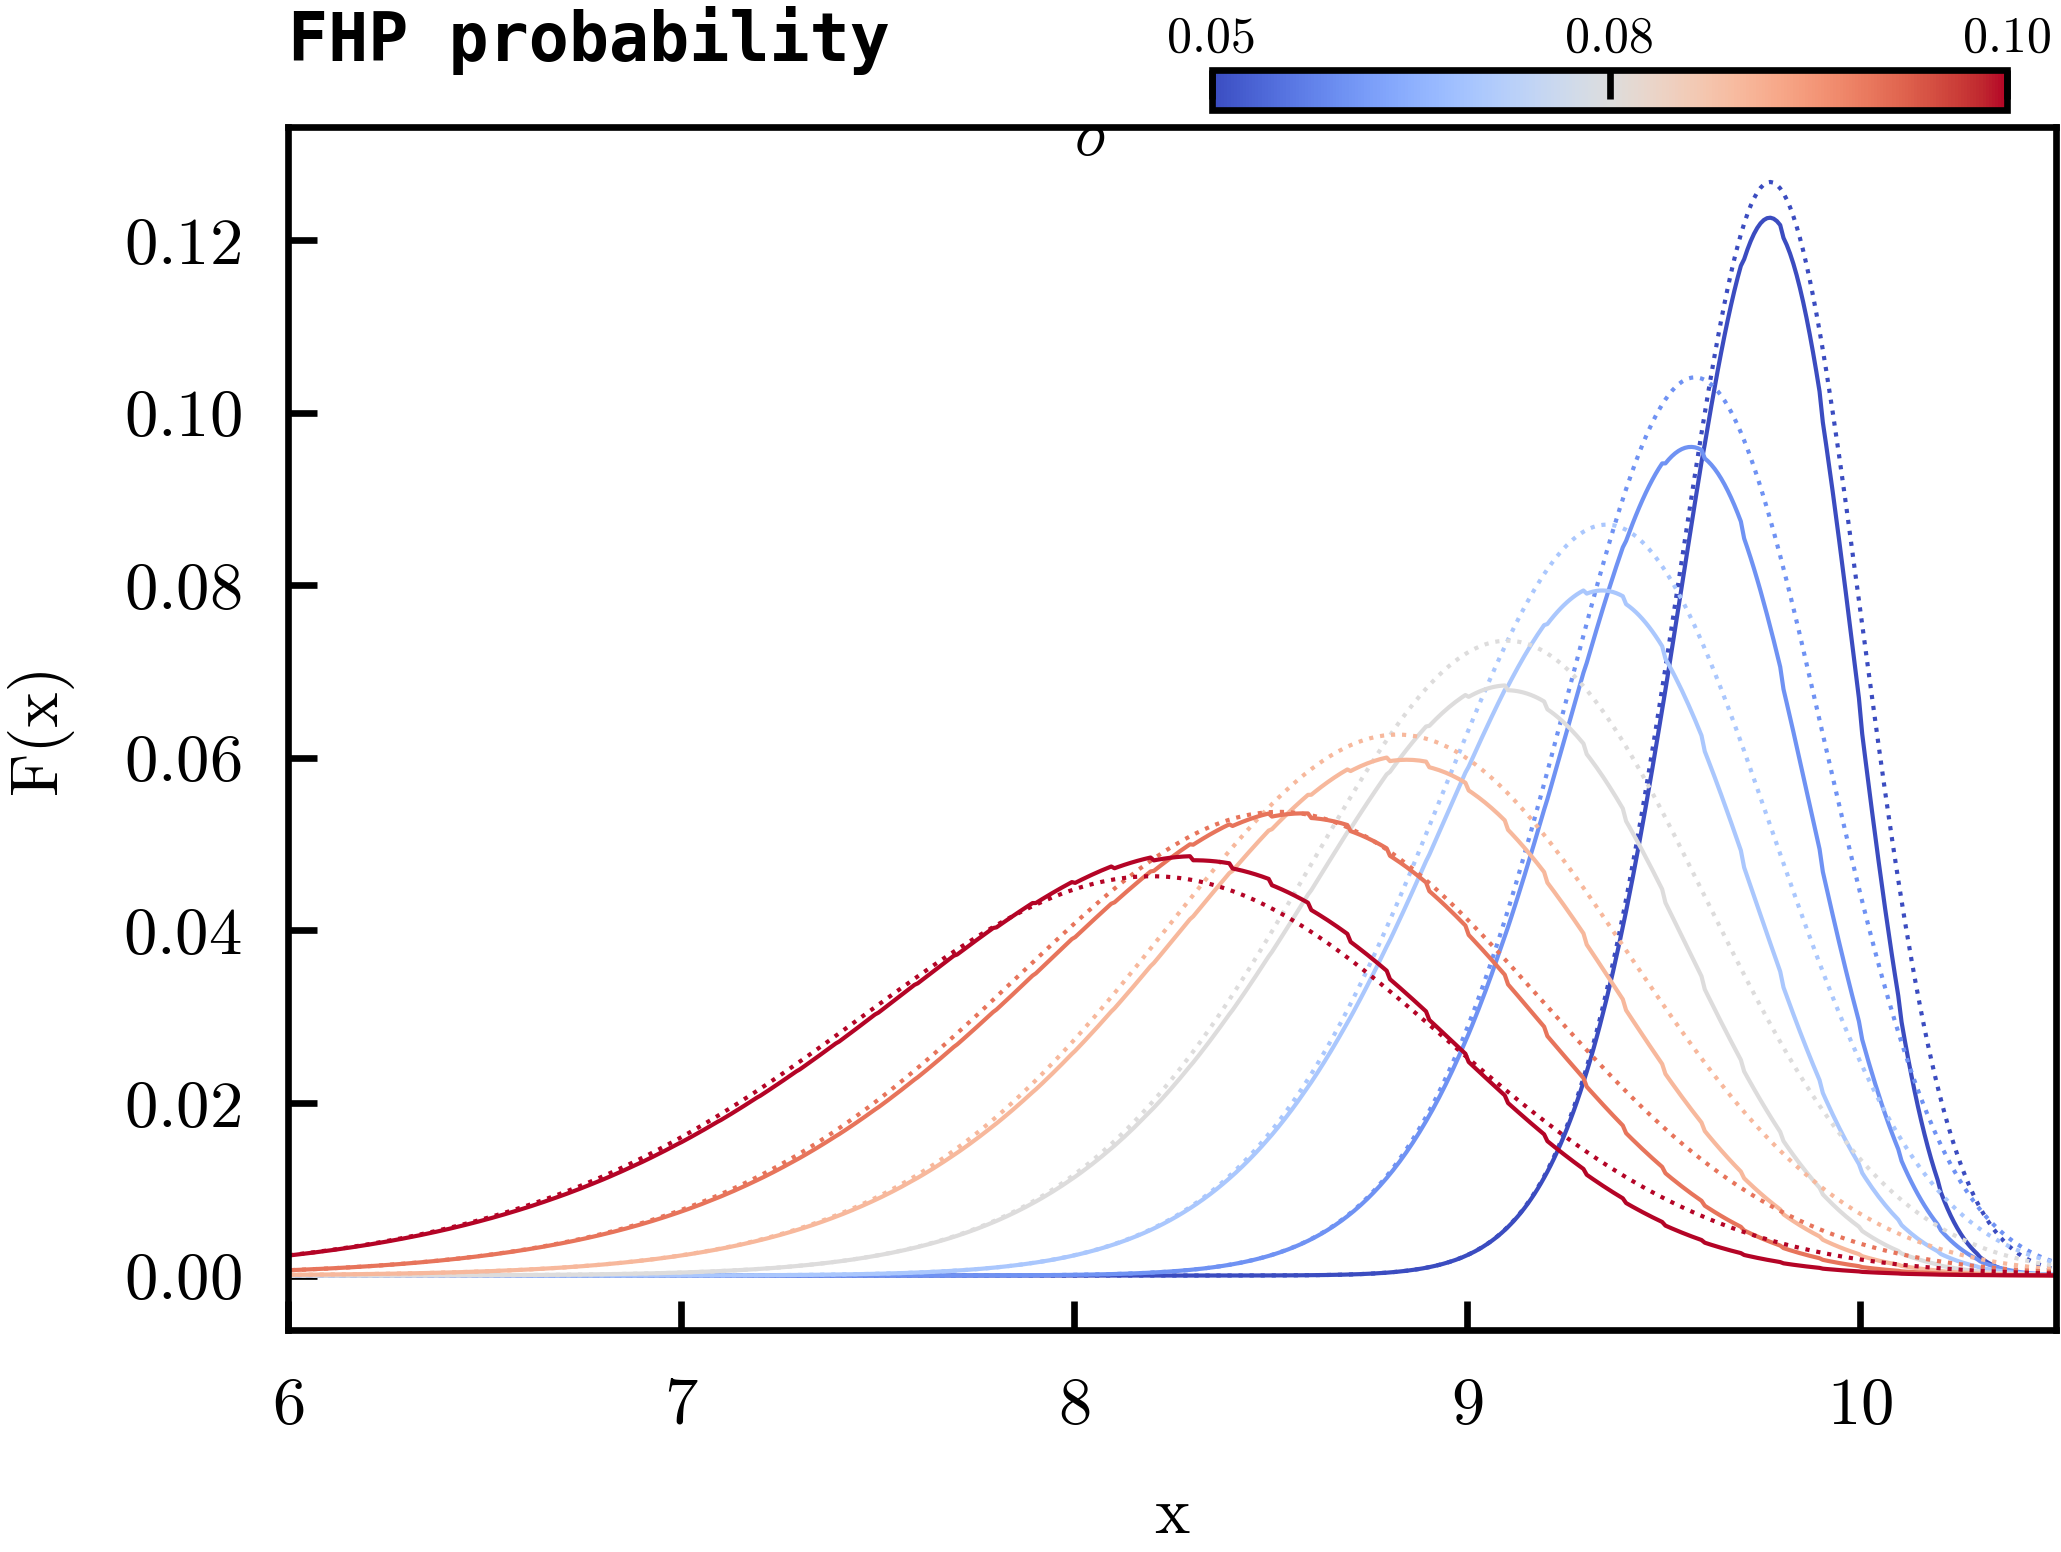

In [627]:
from scipy.special import erf
W = 3.5
fig, ax = plt.subplots(figsize = (W, W * 3/4), layout = 'constrained')
x = np.linspace(-1,4,600)
lcx = 0.1
a_list = np.linspace(0.05, 0.2, 7, endpoint = True)
colors = plt.cm.coolwarm(np.linspace(0,1,len(a_list)))
s = ax.scatter(np.zeros(len(colors)), np.zeros(len(colors)), c = np.linspace(0,1,len(a_list)), cmap = 'coolwarm')
L = 10
def S(x, a) :
  x_0 = np.linspace(0, L - x,int((L-x)/lcx))
  return np.prod(1/2 + 1/2*erf((L - x_0)/(a * L)))*(1/2 - 1/2*erf(x/(a * L)))
def f(x, a) :
  return (1/2 + 1/2*erf((x - 2.1 * a**1.5*L )/(0.36 * a**0.8*L)))*(1/2 - 1/2*erf(x/(a * L)))
for a, color in zip(a_list, colors) :
  ax.plot(L-x, [S(i, a) for i in x], label = f'$\sigma  = {a:.2f}$', color = color, lw = .5)
  ax.plot(L-x, [f(i,a) for i in x], color = color, linestyle = ':', lw = .5)
ax.set_ylabel("F(x)")
ax.set_xlabel("x")
ax.set_title('FHP probability', loc='left',
    fontweight='bold',
    family='monospace',)
ax.set_xlim(6,10.5)
cbar = fig.colorbar(s, ax = ax, location = 'top', anchor = (.95,1), shrink = 0.45, orientation = 'horizontal', pad = -.1)
cbar.set_ticklabels([f"{a:.2f}" for a in a_list[:-1]], fontsize = 6)
cbar.ax.tick_params(pad = 1)
fig.text(0.53,.91, '$\sigma$', ha = 'center', va = 'center', fontsize = 8)
plt.savefig('../../Report/figures/First_Hitting.pdf', dpi = 600, bbox_inches = 'tight')

/tmp/ipykernel_12146/1129641065.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  p_opt, p_cov = curve_fit(equation, x, [S(i, a) for i in x], p0 = [1e-2,1e-2])


[0.01       0.02761856]
[0.01       0.05008323]
[0.01       0.07508109]
[0.01       0.10190644]
[0.01       0.13015202]
[0.01       0.15955254]
[0.01       0.18992162]


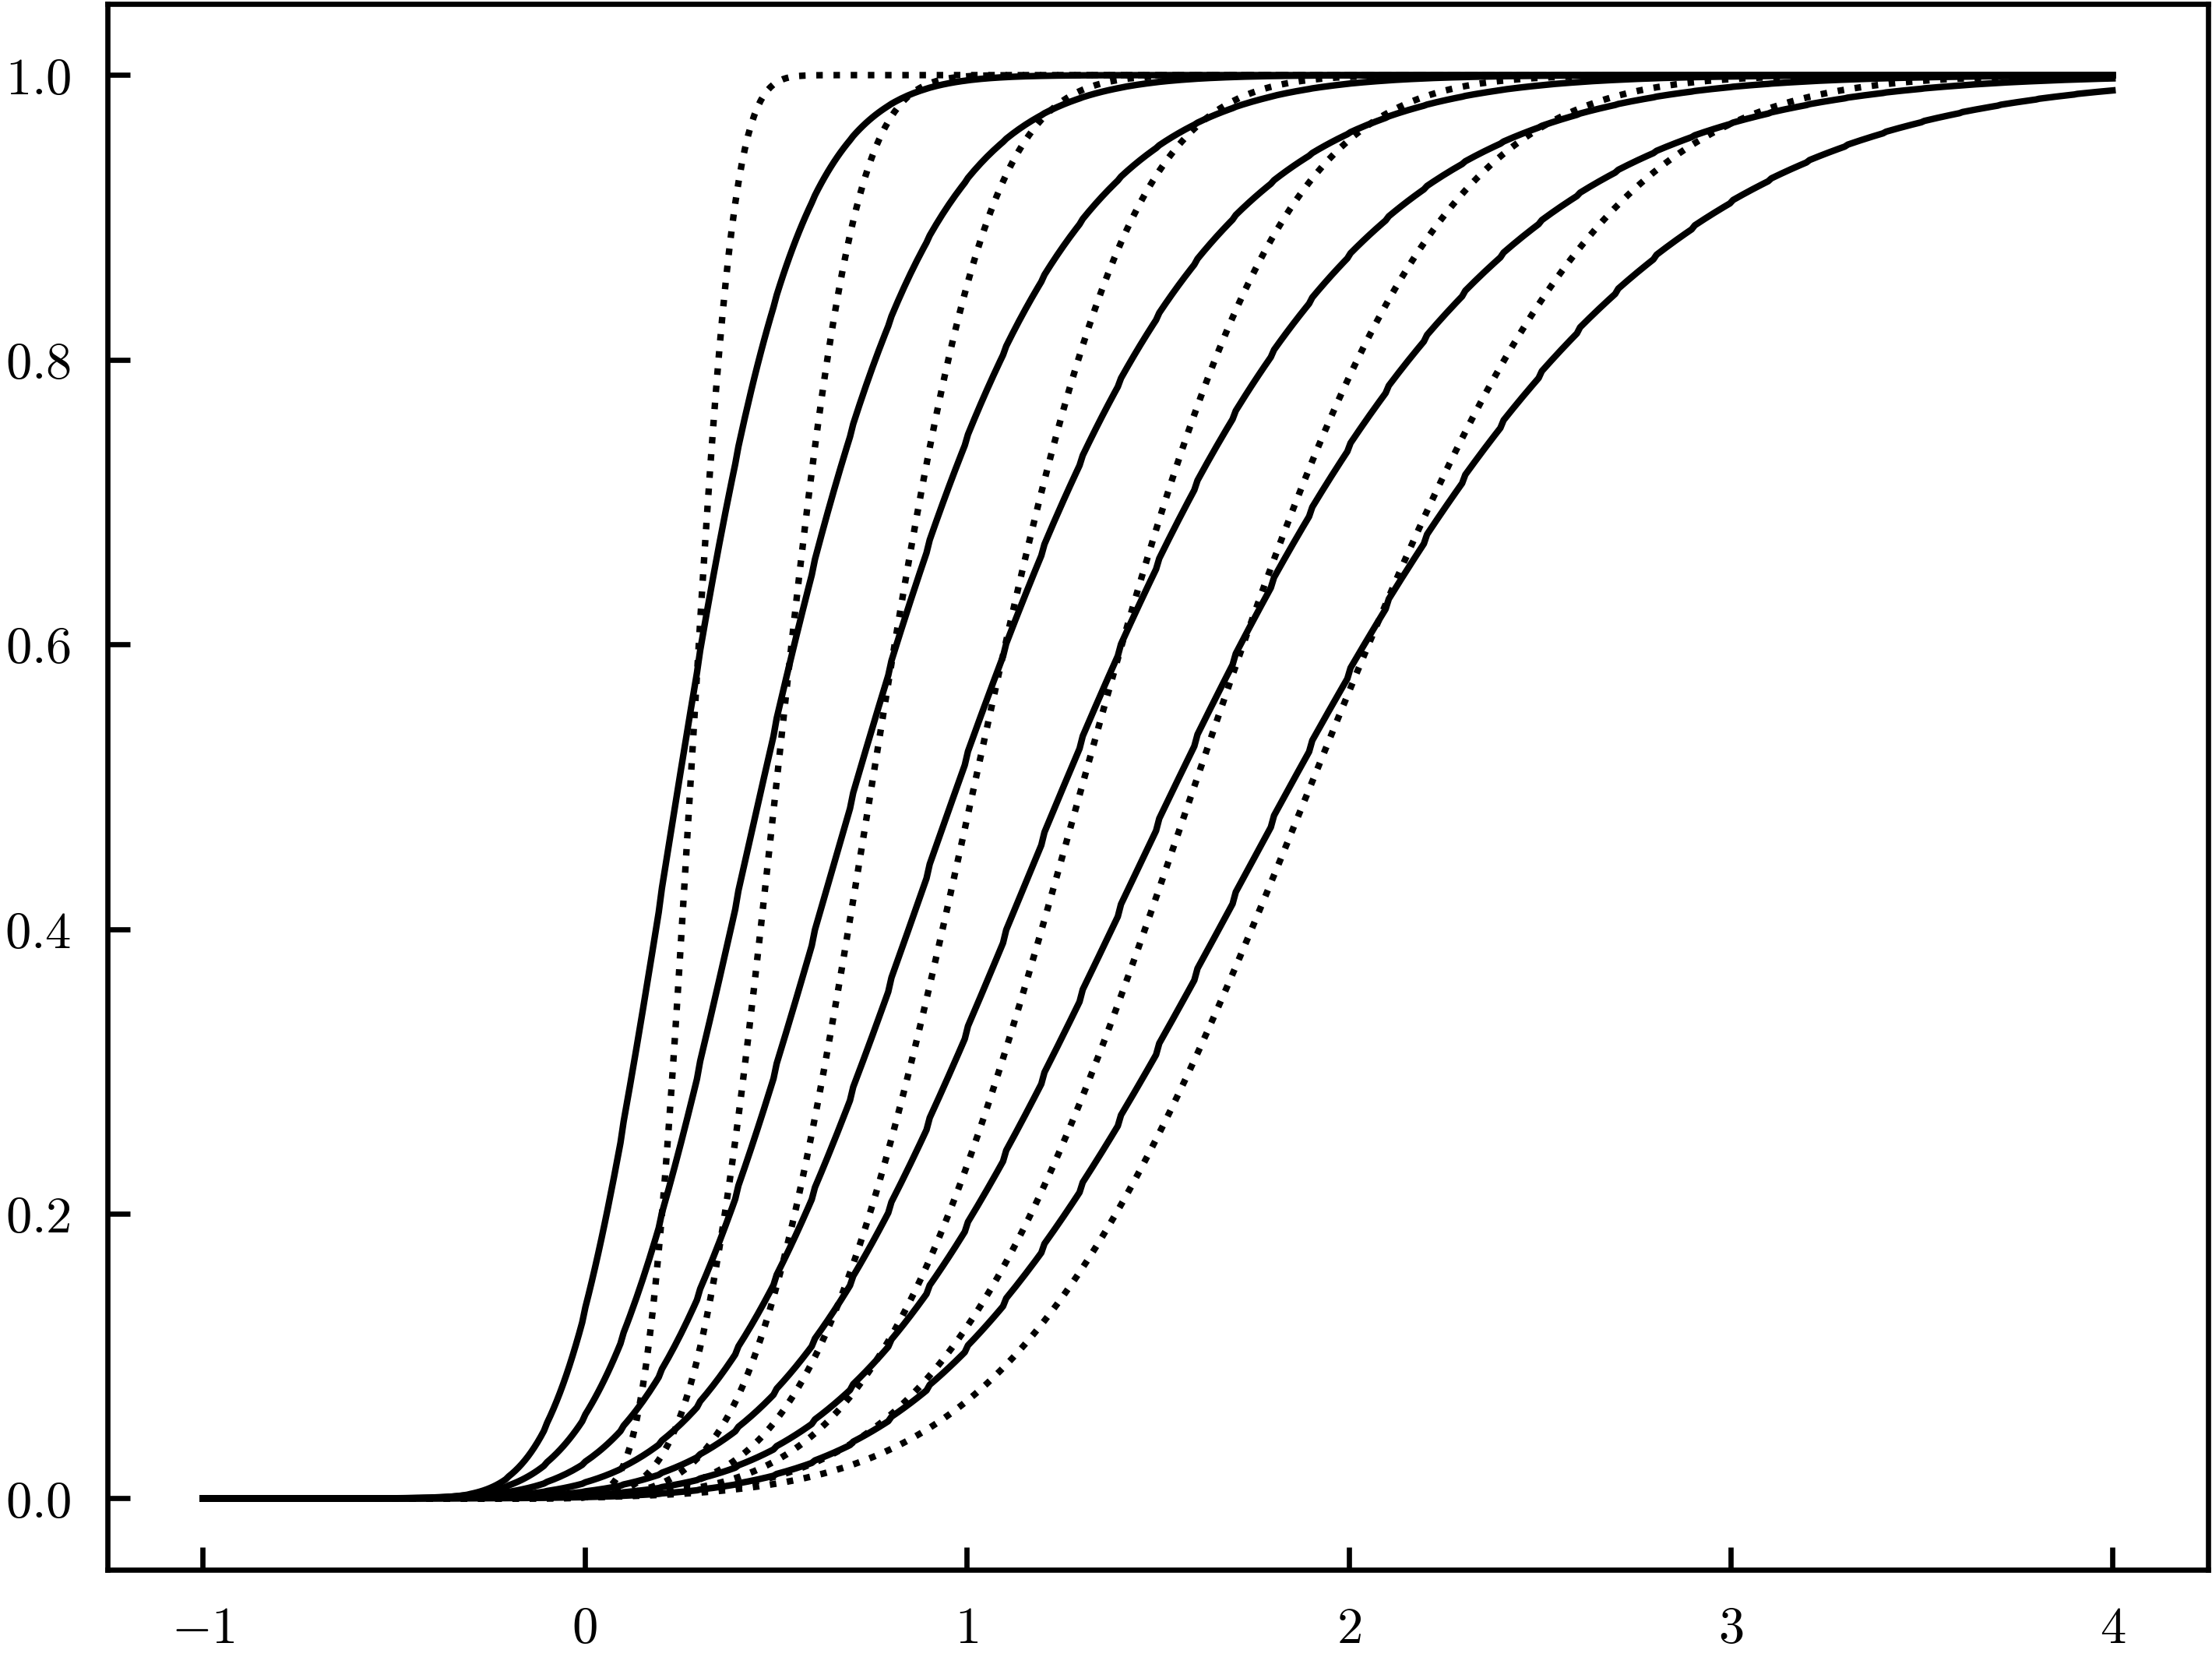

In [495]:
from scipy.optimize import curve_fit
p_opts = []
for a in a_list :
  def equation(x, b,c) :
    return 1/2 + 1/2*erf((x - c*L)/(.45*c*L))
  p_opt, p_cov = curve_fit(equation, x, [S(i, a) for i in x], p0 = [1e-2,1e-2])
  plt.plot(x, equation(x, *p_opt), color = 'k', linestyle = ':', lw = 1)
  plt.plot(x, [S(i, a) for i in x], color = 'k', linestyle = '-', lw = 1)
  print(p_opt)
  p_opts.append(p_opt)




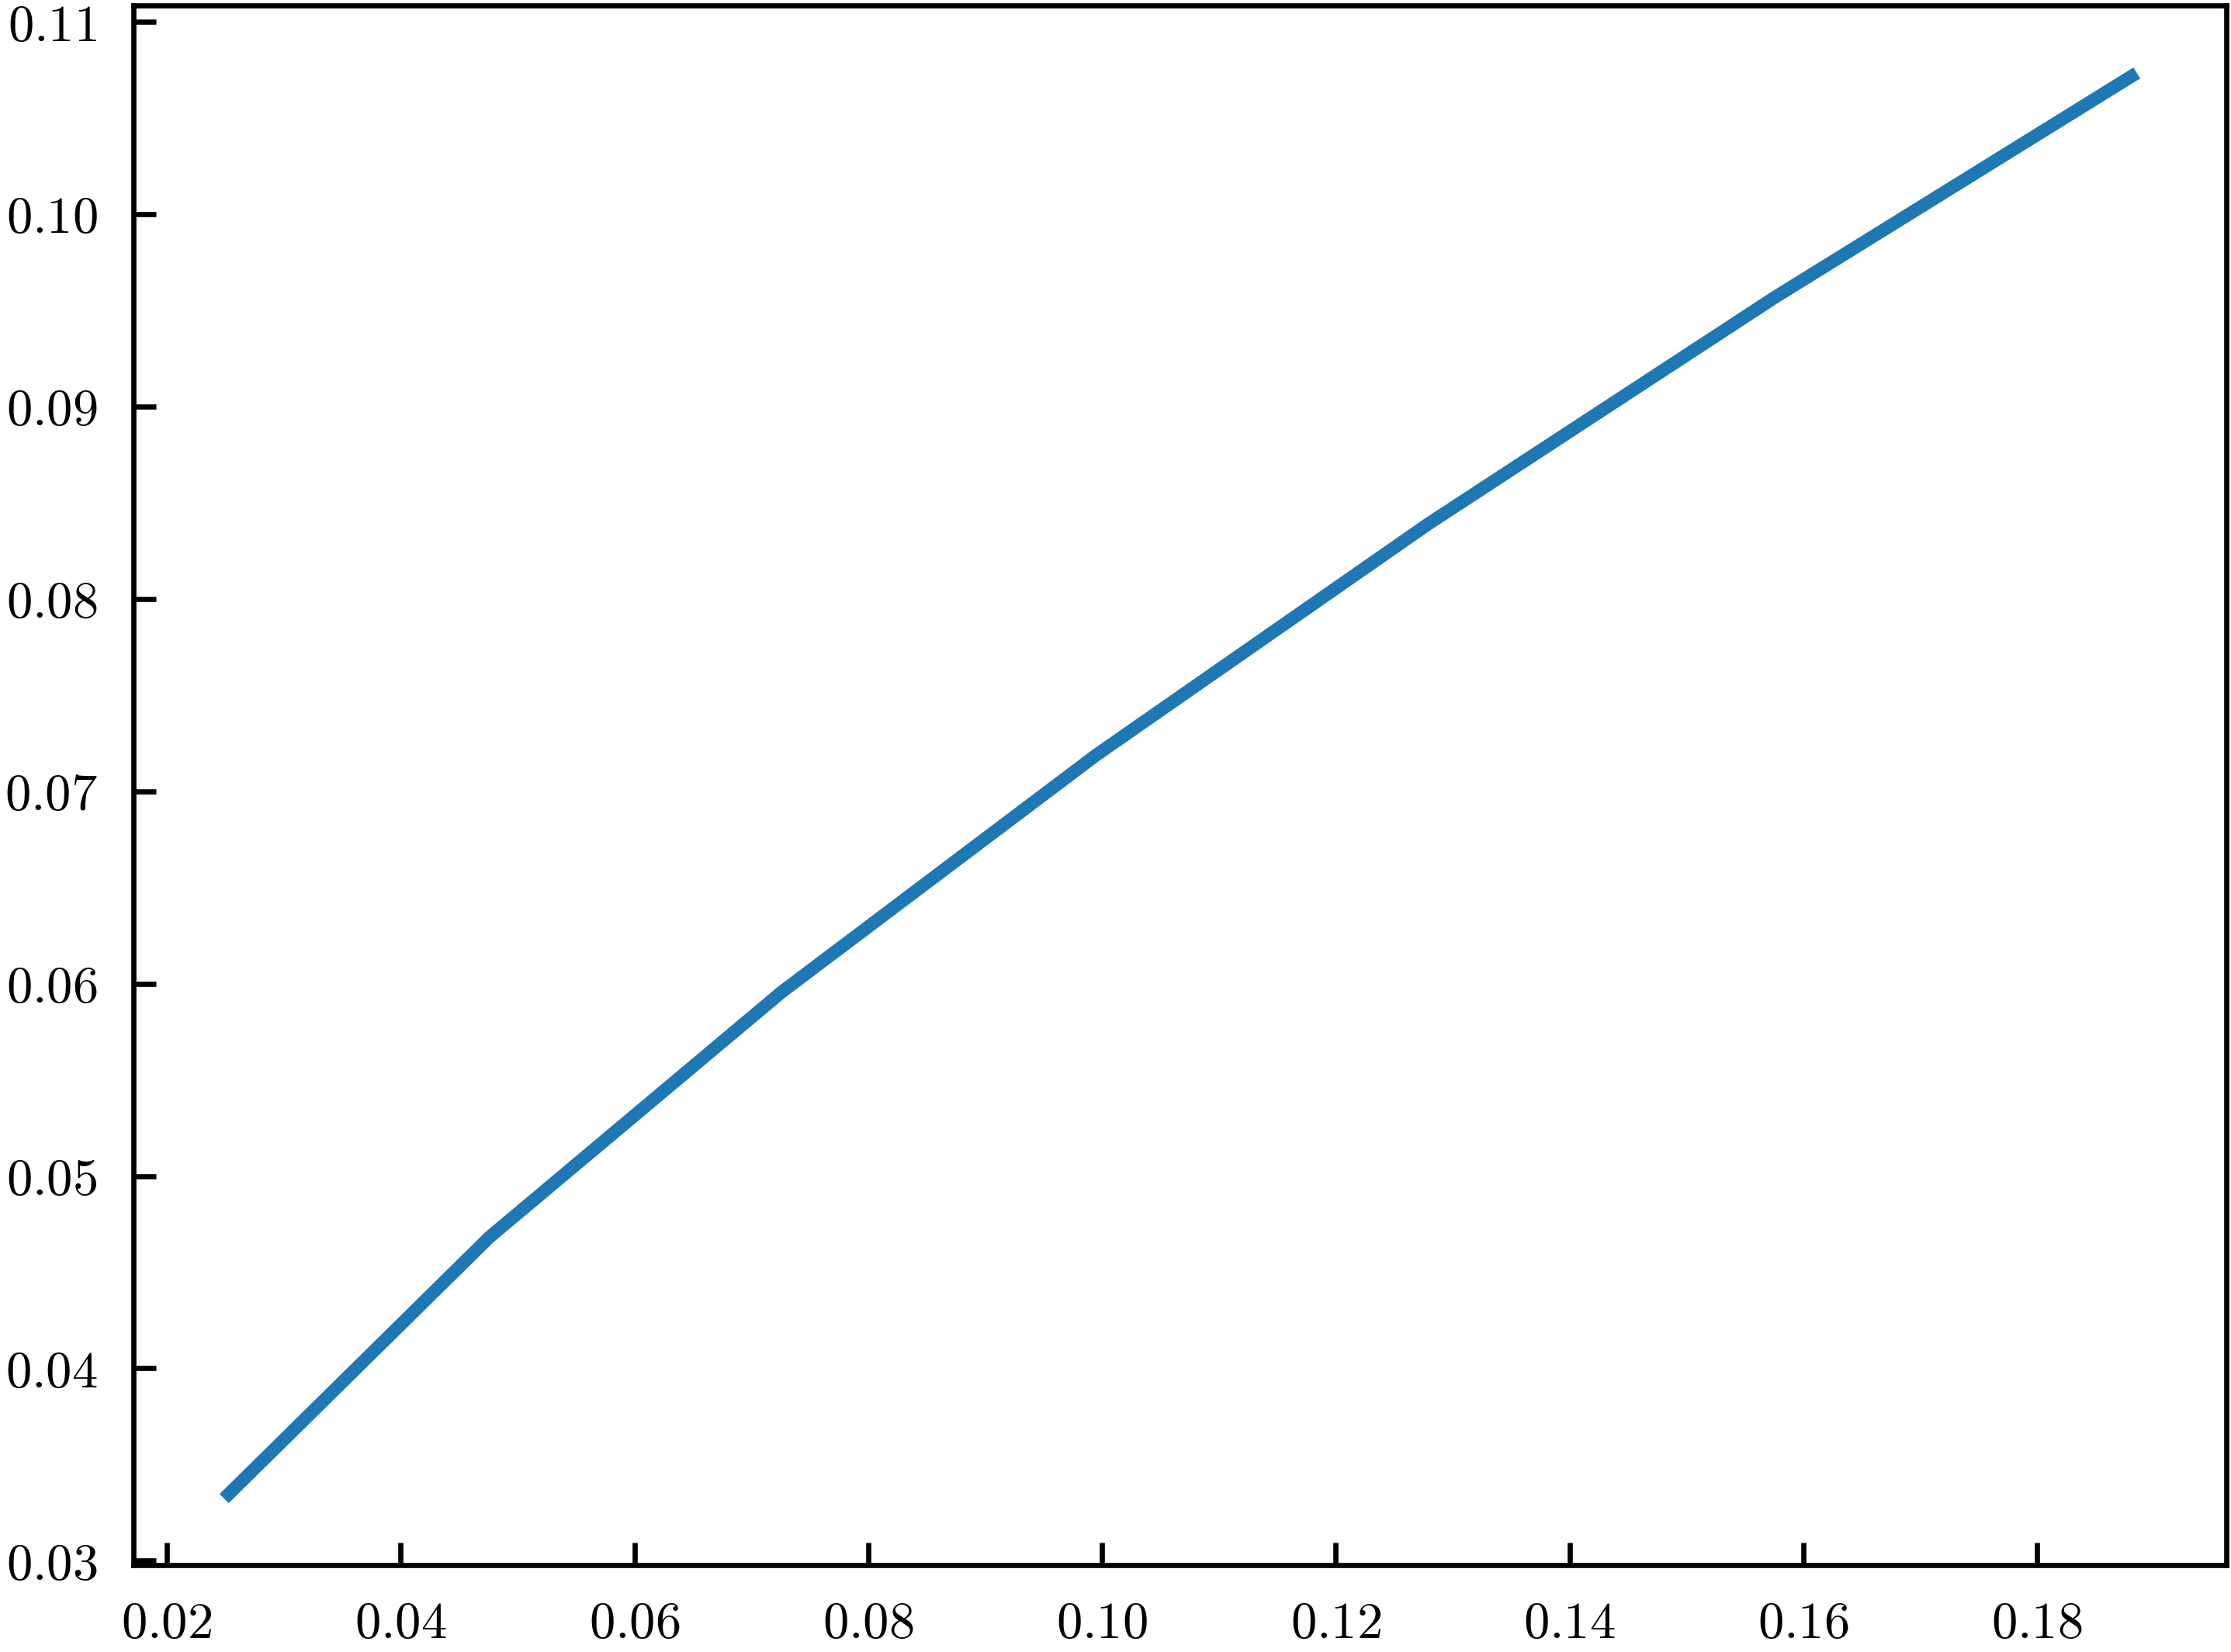

In [491]:
plt.plot(np.array(p_opts)[:,1], np.array(p_opts)[:,0])
# plt.plot(a_list, 1/np.array(a_list)*1e-3 + 0.31)
res = np.polyfit(np.array(p_opts)[:,1], np.array(p_opts)[:,0], 1)

In [492]:
res

array([0.44768699, 0.02525845])

INTRODUCTION

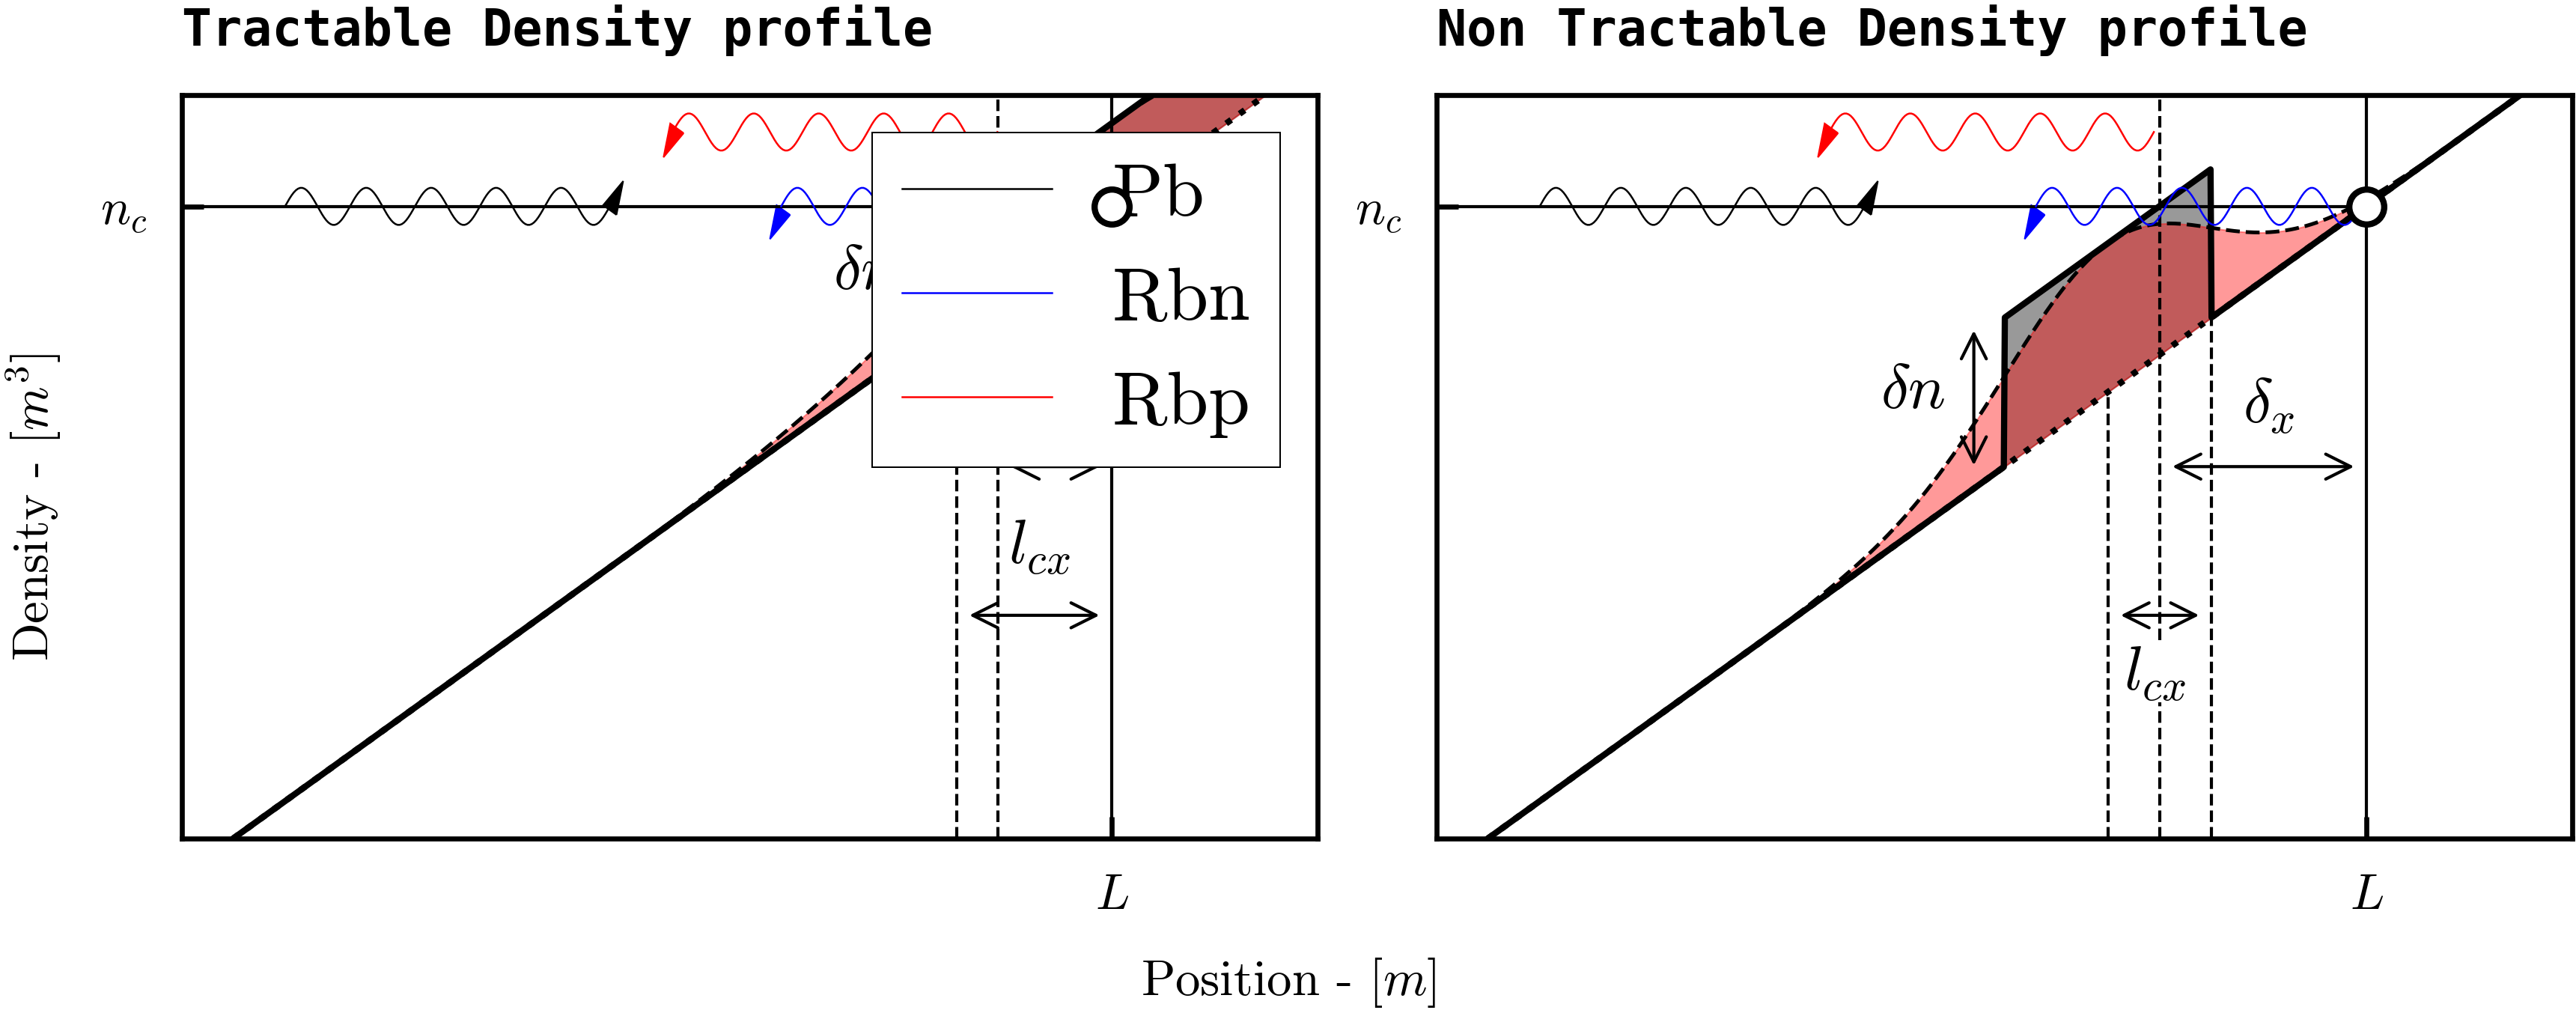

In [2]:
W = 5.8
n = np.linspace(0,1,1000)
dn = np.concatenate([np.zeros(700), np.ones(300)/9])
fig, ax = plt.subplots(1,2, figsize = (W, W * 2/5), layout = 'constrained')
gaussian = np.exp(-((n - .850)**2)/(2 * .150**2)) * 1/9

ax[0].plot(n + dn, color = 'k', lw = 1)
ax[0].plot(n, color = 'k', ls = ':', lw = 1)
ax[0].plot(np.arange(1000), n + gaussian, color = 'k', ls = '--', lw = .6)

ax[0].fill_between(range(1000), n, n + dn, color = 'k', alpha = .4)
ax[0].fill_between(range(1000), n, n + gaussian, color = 'r', alpha = .4)

ax[0].annotate('', xy=(670,.82), xytext=(670,.68), arrowprops=dict(arrowstyle='<->', linewidth = .5,))
ax[0].text(580, .74, s = "$\\delta n$")


ax[0].set_xticks([850], labels = ['$L$'])
ax[0].set_yticks([.85], labels = ["$n_c$"])
ax[0].plot([850], [.85], marker = 'o', mew = 1, mec = 'k', mfc = 'white', zorder = 10)
ax[0].axhline(0.85, 0, .83, lw  = .5, color = 'k', ls= '-')
ax[0].axvline(850, lw  = .5, color = 'k', ls= '-')
ax[0].axvline(740, lw = .5, color = 'k', ls= '--')
ax[0].axvline(700, ymax = .7, lw = .5, color = 'k', ls= '--')


x = np.linspace(0,10*np.pi,151)
y = np.sin(x)/40 + .850
ax[0].plot(50 + x * 10,y, color="k", lw=".3", label = "Pb")

verts = np.array([[5,0.645],[-5,0.655],[10,0.68],[5,0.645]]).astype(float)*1.3
verts[:,0] += 10*np.pi* 10 + 50
path = mpath.Path(verts)
patch = mpatches.PathPatch(path, fc='k', ec="k",)
ax[0].add_patch(patch)

x = np.linspace(0,10*np.pi,151)
y = np.sin(x)/40 + .850
ax[0].plot(530 + x * 10,y, color="b", lw=".3", label = "Rbn")

verts = np.array([[5,0.645],[-5,0.655],[-10,0.62],[5,0.645]]).astype(float)*1.3
verts[:,0] += 10*np.pi* 10 + 218
path = mpath.Path(verts)
patch = mpatches.PathPatch(path, fc='b', ec="b",)
ax[0].add_patch(patch)


x = np.linspace(0,10*np.pi,151)
y = np.sin(x)/40 + .950
ax[0].plot(425 + x * 10,y, color="r", lw=".3", label = "Rbp")

verts = np.array([[5,0.645],[-5,0.655],[-10,0.62],[5,0.645]]).astype(float)*1.3
verts[:,0] += 10*np.pi* 10 + 115
verts[:,1] += .11
path = mpath.Path(verts)
patch = mpatches.PathPatch(path, fc='r', ec="r",)
ax[0].add_patch(patch)
ax[0].set_title("Tractable Density profile",
    loc='left',
    fontweight='bold',
    family='monospace',)

ax[0].annotate('', xy=(740,.5), xytext=(850,.5), arrowprops=dict(arrowstyle='<->', linewidth = .5,))
ax[0].annotate('', xy=(700,.3), xytext=(850,.3), arrowprops=dict(arrowstyle='<->', linewidth = .5,))
ax[0].text(750, .37, '$l_{cx}$')
ax[0].text(780, .57, '$\\delta_x$')
ax[0].legend()
ax[0].set_ylim(0,1)
n = np.linspace(0,1,1000)
dn = np.concatenate([np.zeros(500), np.ones(200)/5, np.zeros(300)])
gaussian = np.exp(-((n - .600)**2)/(2 * .1**2)) * 1/5


ax[1].plot(n + dn, color = 'k', lw = 1)
ax[1].plot(n, color = 'k', ls = ':', lw = 1)
ax[1].plot(np.arange(1000), n + gaussian, color = 'k', ls = '--', lw = .6)


ax[1].fill_between(range(1000), n, n + dn, color = 'k', alpha = .4)
ax[1].fill_between(range(1000), n, n + gaussian, color = 'r', alpha = .4)

ax[1].annotate('', xy=(470,.485), xytext=(470,.70), arrowprops=dict(arrowstyle='<->', linewidth = .5,))
ax[1].text(380, .58, s = "$\\delta n$")

ax[1].set_xticks([850], labels = ['$L$'])
ax[1].set_yticks([.85], labels = ["$n_c$"])
ax[1].plot([850], [.85], marker = 'o', mew = 1, mec = 'k', mfc = 'white', zorder = 10)
ax[1].axhline(0.85, 0, .83, lw  = .5, color = 'k', ls= '-')
ax[1].axvline(850, lw  = .5, color = 'k', ls= '-')
ax[1].axvline(650, lw = .5, color = 'k', ls= '--')
ax[1].axvline(700, ymax = .7, lw = .5, color = 'k', ls= '--')
ax[1].axvline(600, ymax = .6, lw = .5, color = 'k', ls= '--')


x = np.linspace(0,10*np.pi,151)
y = np.sin(x)/40 + .850
ax[1].plot(50 + x * 10,y, color="k", lw=".3", label = "Pb")

verts = np.array([[5,0.645],[-5,0.655],[10,0.68],[5,0.645]]).astype(float)*1.3
verts[:,0] += 10*np.pi* 10 + 50
path = mpath.Path(verts)
patch = mpatches.PathPatch(path, fc='k', ec="k",)
ax[1].add_patch(patch)

x = np.linspace(0,10*np.pi,151)
y = np.sin(x)/40 + .850
ax[1].plot(530 + x * 10,y, color="b", lw=".3", label = "Rbn")

verts = np.array([[5,0.645],[-5,0.655],[-10,0.62],[5,0.645]]).astype(float)*1.3
verts[:,0] += 10*np.pi* 10 + 218
path = mpath.Path(verts)
patch = mpatches.PathPatch(path, fc='b', ec="b",)
ax[1].add_patch(patch)


x = np.linspace(0,10*np.pi,151)
y = np.sin(x)/40 + .950
ax[1].plot(330 + x * 10,y, color="r", lw=".3", label = "Rbp")

verts = np.array([[5,0.645],[-5,0.655],[-10,0.62],[5,0.645]]).astype(float)*1.3
verts[:,0] += 10*np.pi* 10 + 18
verts[:,1] += .11
path = mpath.Path(verts)
patch = mpatches.PathPatch(path, fc='r', ec="r",)
ax[1].add_patch(patch)
ax[1].set_title("Non Tractable Density profile",
    loc='left',
    fontweight='bold',
    family='monospace',)


ax[1].annotate('', xy=(650,.5), xytext=(850,.5), arrowprops=dict(arrowstyle='<->', linewidth = .5,))
ax[1].annotate('', xy=(700,.3), xytext=(600,.3), arrowprops=dict(arrowstyle='<->', linewidth = .5,))
ax[1].text(645, .2, '$l_{cx}$', bbox=dict(facecolor='w', alpha=1, pad = 0, edgecolor = 'none'), ha = 'center',)
ax[1].text(730, .56, '$\\delta_x$')
ax[1].set_ylim(0,1)

fig.supxlabel("Position - [$m$]", fontsize = 8)
fig.supylabel("Density - [$m^3$]", fontsize = 8)
plt.savefig("../../Report/figures/density_profile.png")

NUMERICAL CALCULATIONS


In [3]:
def delay(time : np.ndarray, sig : np.ndarray) -> float :
    """
    delay return the time delay of the signal

    Parameters
    ----------
    time : np.ndarray
        _description_
    sig : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """
    return time[np.argmax(abs(sig))]

In [4]:
def delay_dispersion(time, signal) -> float:
    """
    delay_dispersion return the dispersion of the signal given a threshold 1/e * max(signal)

    Parameters
    ----------
    time : np.ndarray
        _description_
    signal : np.ndarray
        _description_

    Returns
    -------
    float
        _description_
    """
    mask = np.abs(signal) > np.exp(-1) * np.max(np.abs(signal))
    time_window = time[mask]

    return (time_window[-1] - time_window[0]) / 2

In [5]:
import scipy.constants as cst
n_c = 50e9 ** 2 /cst.e**2*(cst.m_e*cst.epsilon_0)
dt = 2.4509803921568632e-12

### Importing data

In [ ]:
amplitude_norm = []
pulse_norm = []
delay_list_norm = []
std_list = []
dir = os.listdir('../../data/normalized_2500')
for i , subfolder in tqdm(enumerate(dir)) :
    if subfolder[] == 'a' :
        IQ_list = np.array([np.load(f'../../data/normalized_2500/{subfolder}/{file}') for file in os.listdir(f'../../data/normalized_2500/{subfolder}') if file[0] == 'I'])
        std_list.append( np.array([np.load(f'../../data/normalized_2500/{subfolder}/{file}',  allow_pickle=True) for file in os.listdir(f'../../data/normalized_2500/{subfolder}') if file[0] == 's']))
        amplitude_norm.append(float(subfolder.split('_')[1]))
        pulse_norm.append(IQ_list[:,1])
        delay_list_norm.append([delay(*IQ) for IQ in IQ_list])

In [8]:
np.save('./extract_data/delay_list_norm_2', delay_list_norm)
np.save('./extract_data/pulse_norm_2', pulse_norm)
np.save('./extract_data/amplitude_norm_2', amplitude_norm)

In [6]:
pulse_norm = np.load('./extract_data/pulse_norm.npy')
delay_list_norm = np.load('./extract_data/delay_list_norm.npy')
amplitude_norm = np.load('./extract_data/amplitude_norm.npy')

In [7]:
delay_list_norm.shape

(30, 201)

In [8]:
pulse_norm_2 = np.load('./extract_data/pulse_norm_2.npy')
delay_list_norm_2 = np.load('./extract_data/delay_list_norm_2.npy')
amplitude_norm_2 = np.load('./extract_data/amplitude_norm_2.npy')

In [9]:
pulse_4 = np.load('./extract_data/pulse_4.npy')
delay_list_4 = np.load('./extract_data/delay_list_4.npy')
amplitude_4 = np.load('./extract_data/amplitude_4.npy')
index_2 = np.argsort(amplitude_4)


In [10]:
pulse_quad = np.load('./extract_data/pulse_quad.npy')
delay_list_quad = np.load('./extract_data/delay_list_quad.npy')
amplitude_quad = np.load('./extract_data/amplitude_quad.npy')

In [23]:
pulse_4.shape

(96, 504, 2893)

In [11]:

amp = np.std(abs(pulse_norm), axis = 2)
amp_2 = np.std(abs(pulse_4), axis = 2)
amp_3 = np.std(abs(pulse_quad), axis = 2)

In [36]:
index = np.argsort(amplitude_norm)
index_2 = np.argsort(amplitude_4)
index_3 = np.argsort(amplitude_quad)
index_4 = np.argsort(amplitude_norm_2)

In [13]:
rms_n, rms_td = np.load('./extract_data/1d.npy')

In [14]:
dt_theo =  2 * 0.1 / 3e8 * np.sqrt(10) * np.array(rms_n)

### DENSITY PROFILE

In [13]:
x = np.linspace(0,10,1000)
L = 10
n_lin = n_c * (x ) / L
n_quad = n_c * (1.25 - (1.5 * L - x )**2 / L**2)
n_lin[n_lin < 0 ] = 0
n_quad[n_quad < 0] = 0

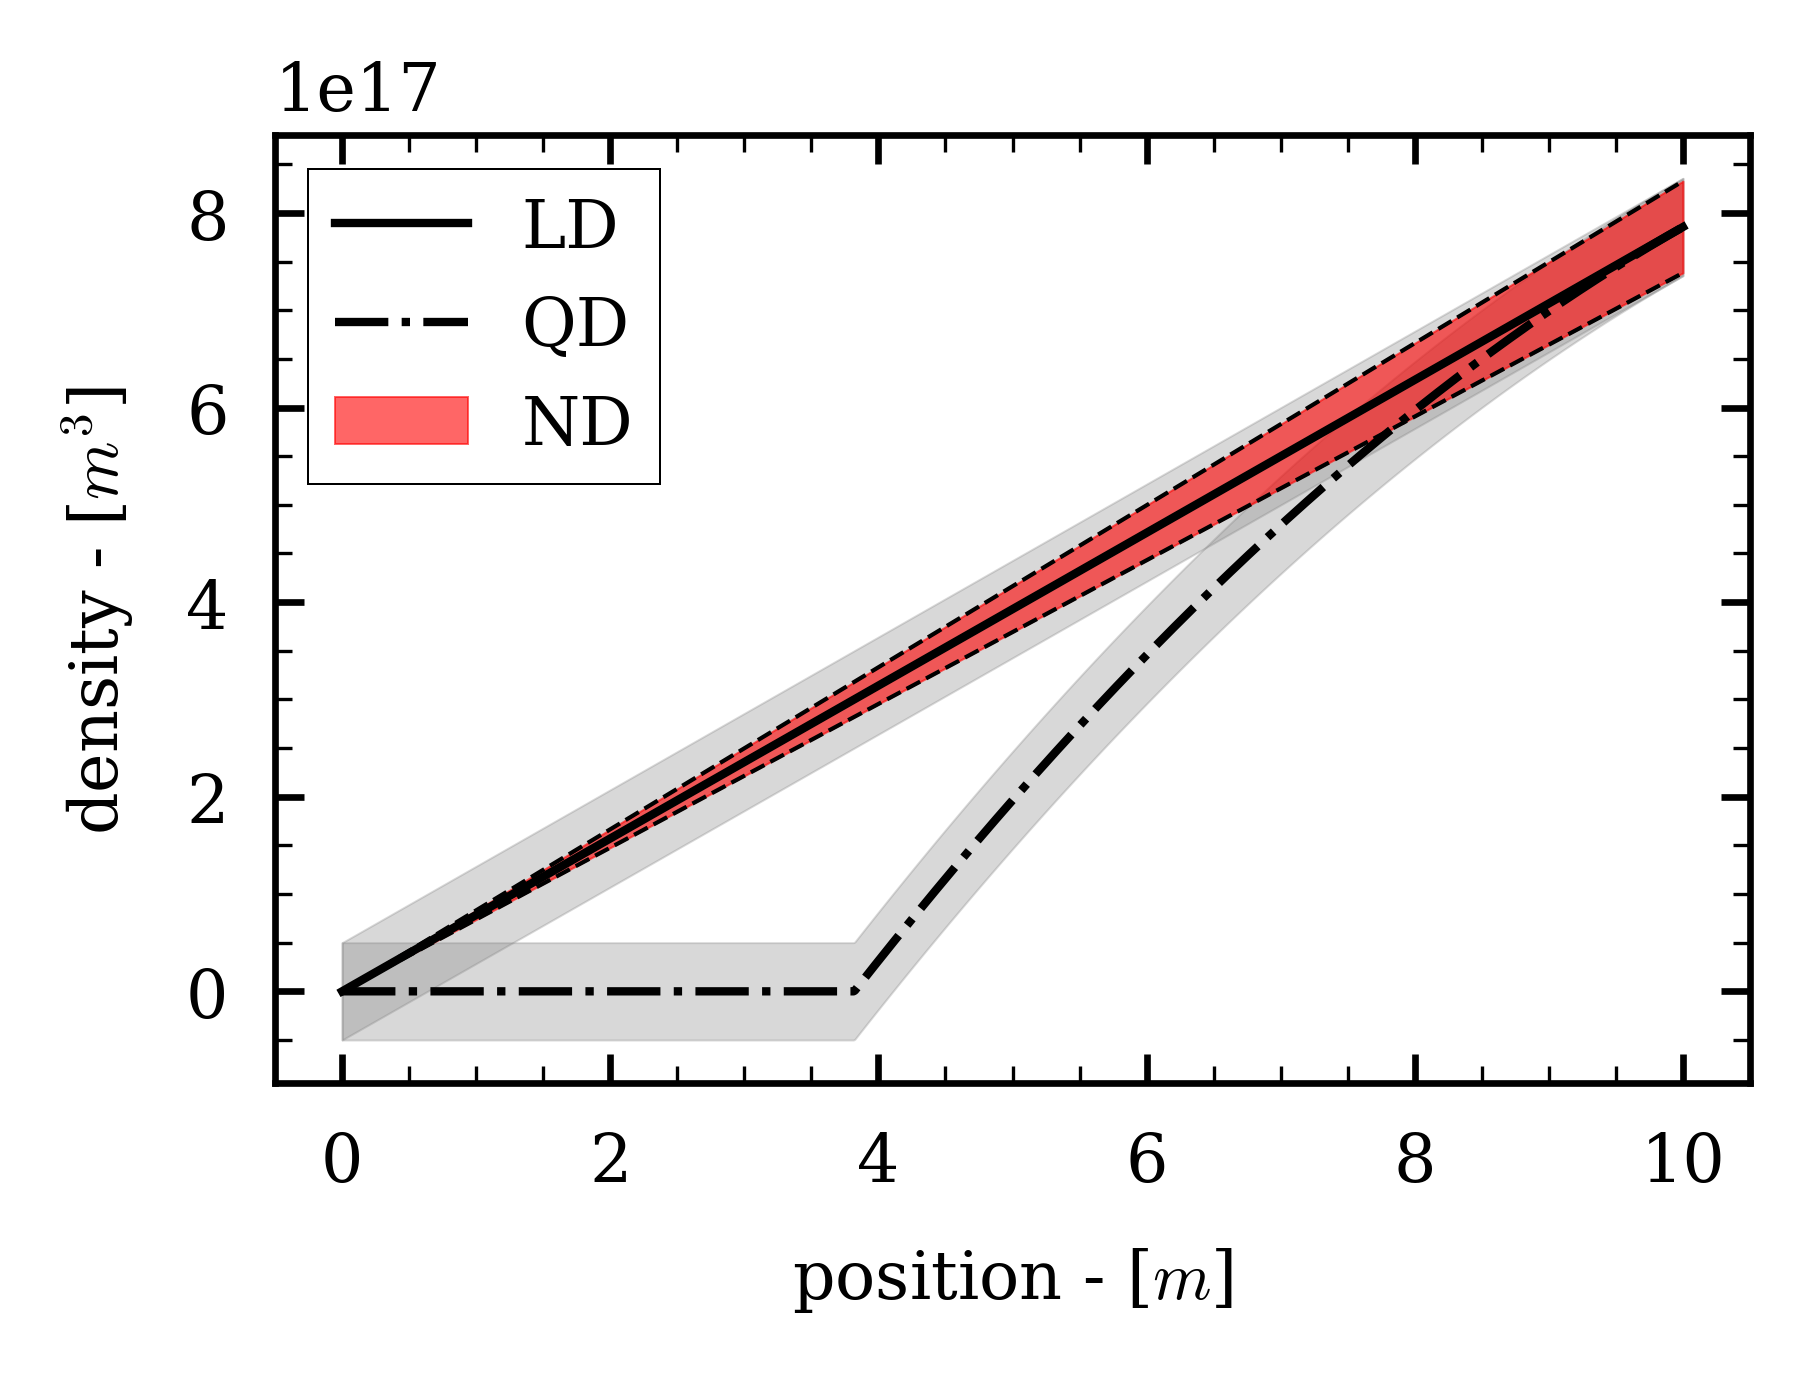

In [160]:
W = 2.9
fig, ax = plt.subplots(figsize = (W, W * 3/4))
ax.plot(x,n_lin, zorder = 10, color = 'k', lw = 1, ls = '-', label = 'LD')

ax.fill_between(x, n_lin - 5e16, n_lin + 5e16, alpha = .3, zorder = 0 , color = 'grey')

ax.plot(x, n_quad, zorder = 10, lw = 1, ls = '-.', color = 'k', label = 'QD')
ax.fill_between(x, n_quad - 5e16, n_quad + 5e16, alpha = .3, zorder = 1, color = 'grey',)
ax.fill_between(x,   n_lin - n_lin * .06,   n_lin + n_lin * .06, alpha = .6, zorder = 3, color = 'r', label = 'ND')

ax.plot(x,  n_lin + n_lin * .06, color = 'k', lw = .5, ls = '--', zorder = 4)
ax.plot(x,  n_lin - n_lin * .06, color = 'k', lw = .5, ls = '--', zorder = 4)
ax.set_ylabel('density - [$m^3$]')
ax.set_xlabel('position - [$m$]')
ax.legend()
plt.savefig('../../Report/figures/background_density.png', dpi = 500)

Introduction to the distribution analysis

In [84]:
FWHM_2 =  np.array([[delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group] for pulse_group in pulse_4])

In [37]:
FWHM_2.shape

(96, 504)

/home/andrea/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/andrea/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


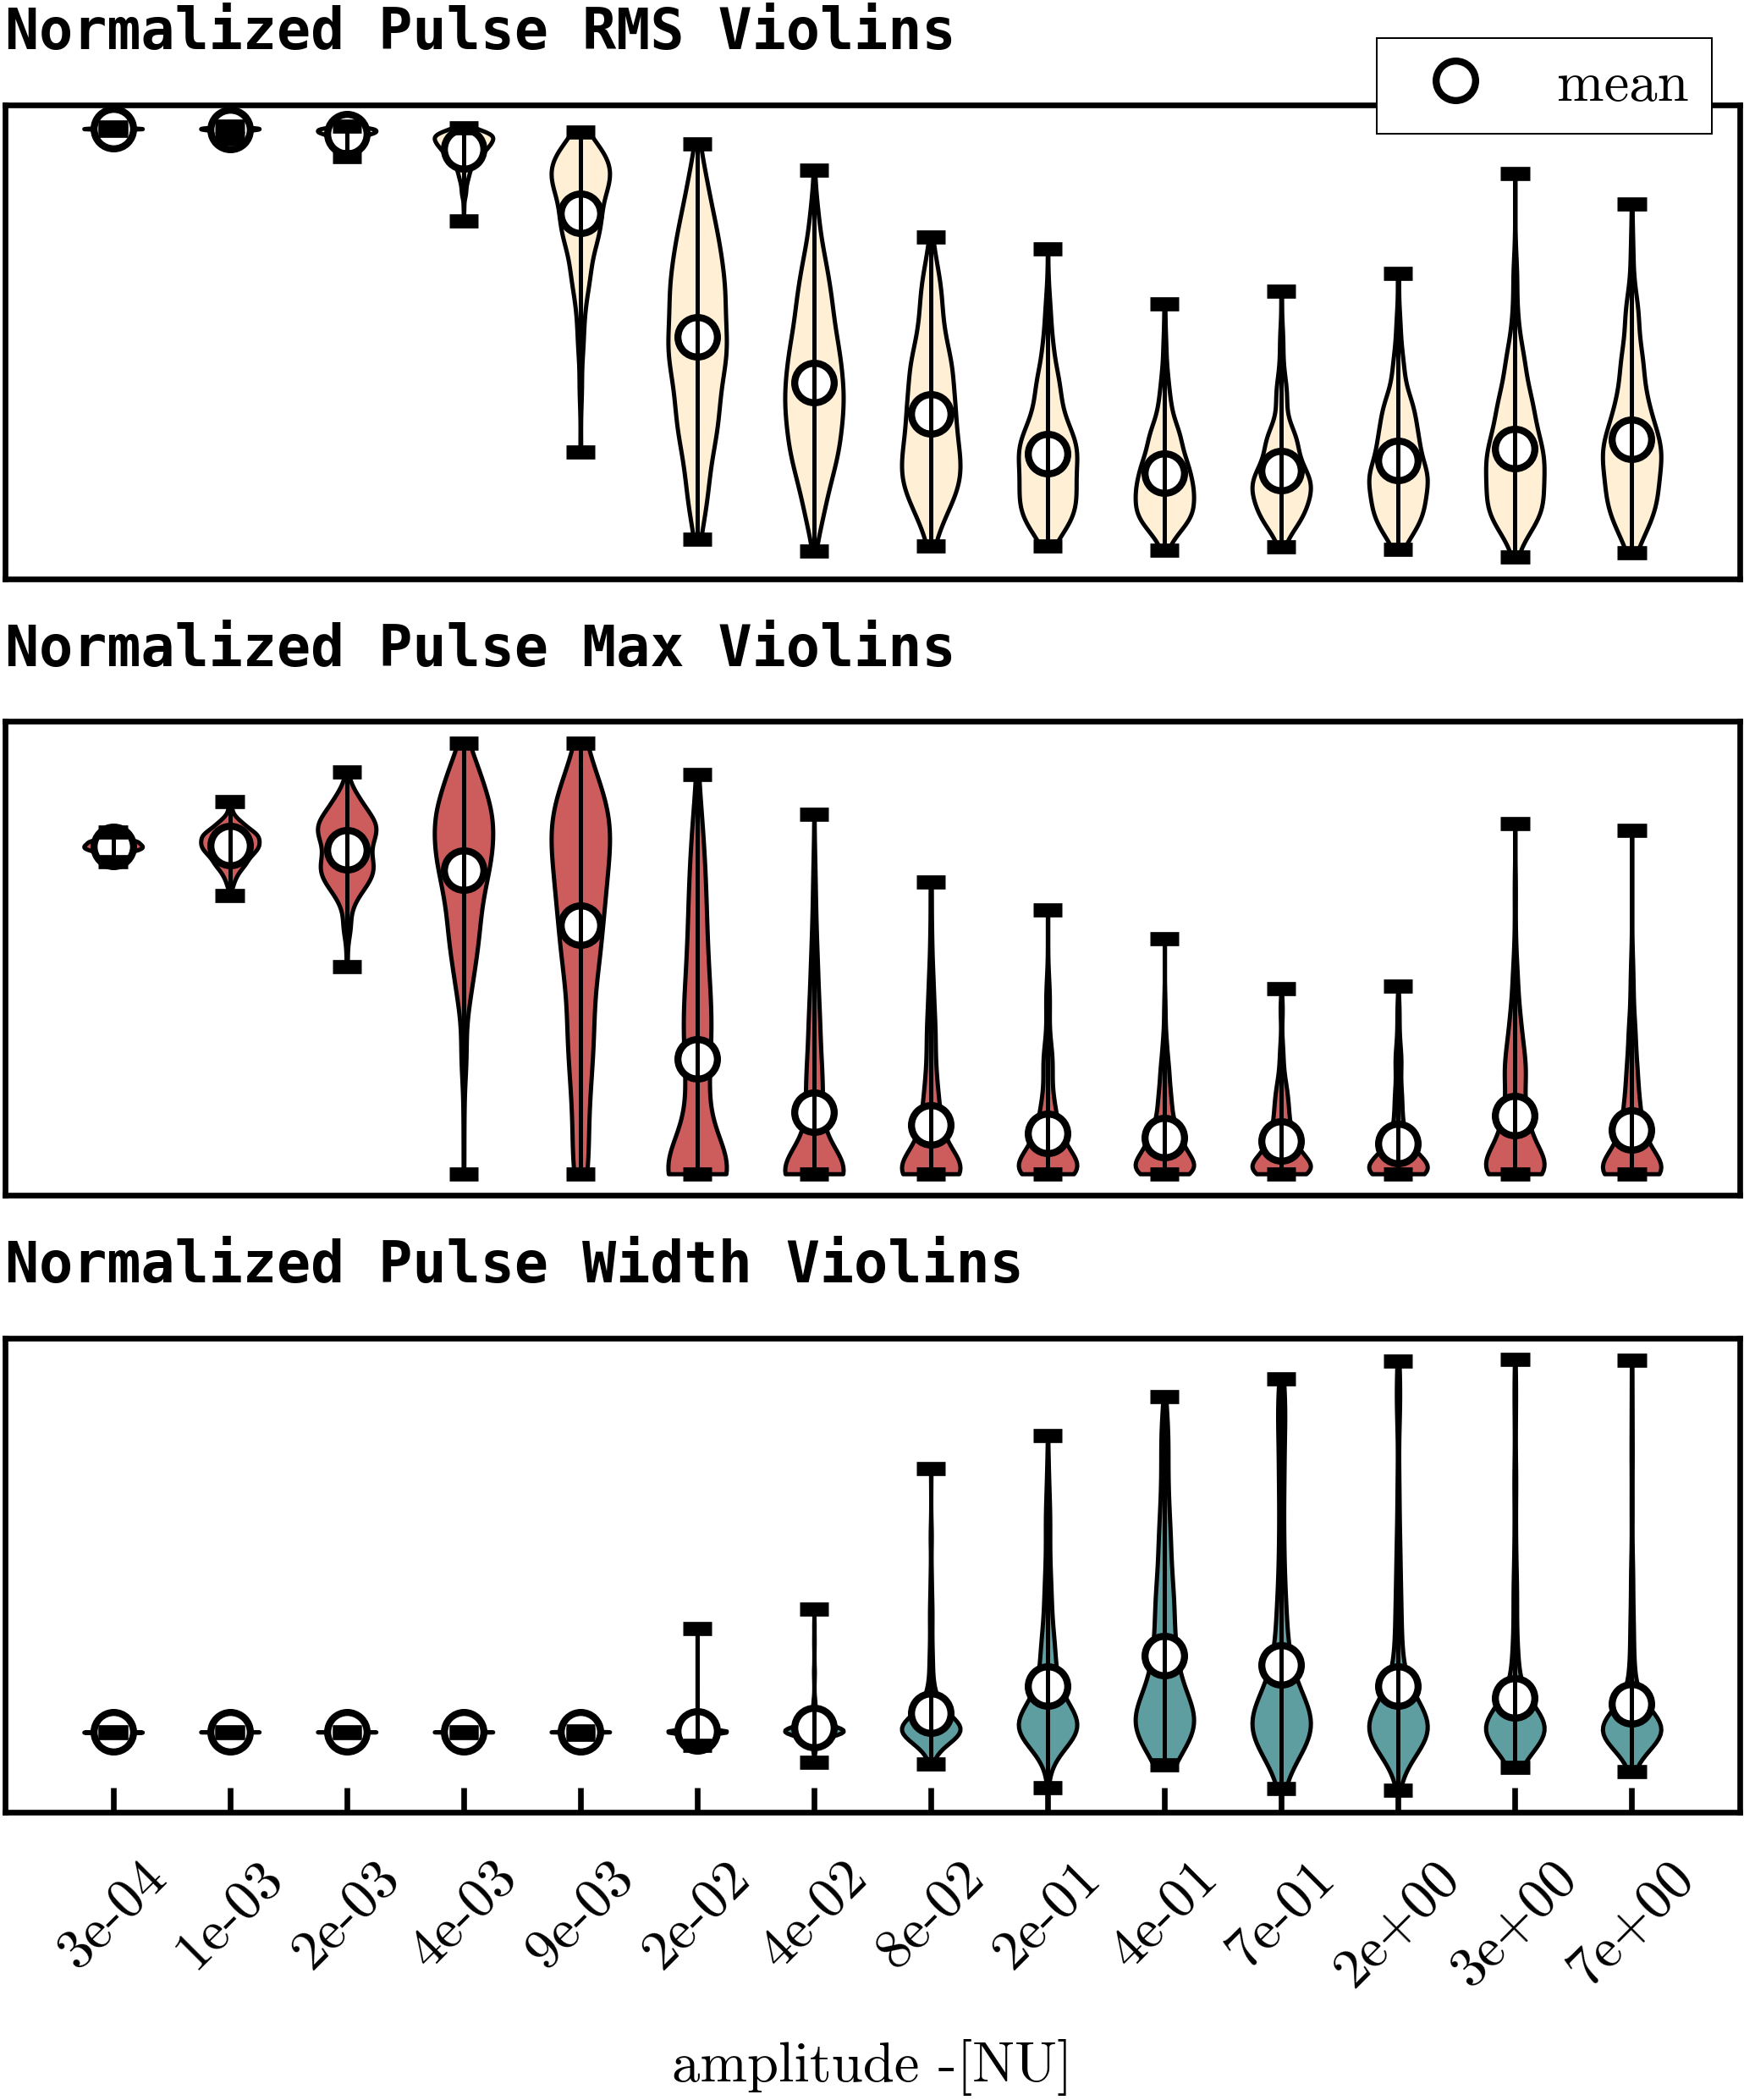

In [86]:
W = 3.5    # Figure width in inches, approximately A4-width - 2*1.25in margin
fig, axs = plt.subplots(3, 1, figsize = (W, W * 6/ 5), layout = 'constrained')

ax, ax2, ax3= axs
ax.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.mean(amp_2, axis = 1)[index_2][::7], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
# ax.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.median(amp_2, axis = 1)[index_2][::7], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
# ax.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.max(amp_2, axis = 1)[index_2][::7], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
# ax.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.min(amp_2, axis = 1)[index_2][::7], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax.violinplot(np.array(amp_2)[index_2][::7, :].real.T, showmeans=False, showmedians=False)
ax.set_title("Normalized Pulse RMS Violins",
    loc='left',
    fontweight='bold',
    family='monospace',)

ax.set_xticks([])
for pc in violins['bodies']:
    pc.set_color('papayawhip')
    pc.set_alpha(1)
    pc.set_edgecolor('k')
    pc.set_linewidth(.6)

violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.6)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax.set_yticks([])
ax.legend(loc = 'upper right', bbox_to_anchor = (1,1.2), fontsize = 8)
amp2 = np.max(pulse_4, axis = 2)

ax2.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.mean(amp2, axis = 1)[index_2][::7], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
# ax2.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.median(amp2, axis = 1)[index_2][::7], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
# ax2.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.max(amp2, axis = 1)[index_2][::7], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
# ax2.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.min(amp2, axis = 1)[index_2][::7], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax2.violinplot(np.array(amp2)[index_2][::7,:].real.T, showmeans=False, showmedians=False)


ax2.set_xticks([])

ax2.set_title("Normalized Pulse Max Violins",
    loc='left',
    fontweight='bold',
    family='monospace',)

for pc in violins['bodies']:
    pc.set_color('indianred')
    pc.set_alpha(1)
    pc.set_edgecolor('k')
    pc.set_linewidth(.6)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.6)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax2.set_yticks([])


ax3.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.mean(FWHM_2, axis = 1)[index_2][::7], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1 , label = 'mean')
# ax3.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.median(FWHM_2, axis = 1)[index_2][::7], lw = 0, marker = 'o', mfc = 'w', mec = 'k', mew = 1. , label = 'median')
# ax3.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.max(FWHM_2, axis = 1)[index_2][::7], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1. , label = 'max')
# ax3.plot(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1), np.min(FWHM_2, axis = 1)[index_2][::7], lw = 0, marker = '.', mfc = 'none', mec = 'k', mew = 1, label = 'min')
violins = ax3.violinplot(np.array(FWHM_2)[index_2][::7,:].real.T, showmeans=False, showmedians=False)


ax3.set_xticks(range(1, len( np.array(amplitude_4)[index_2][::7]) + 1))
ax3.set_xticklabels([f'{r:.0e}' for r in np.array(amplitude_4)[index_2][::7]], rotation = 45)
ax3.set_xlabel('amplitude -[NU]')

ax3.set_title("Normalized Pulse Width Violins",
    loc='left',
    fontweight='bold',
    family='monospace',)

for pc in violins['bodies']:
    pc.set_color('cadetblue')
    pc.set_alpha(1)
    pc.set_edgecolor('k')
    pc.set_linewidth(.6)
violins['cbars'].set_color('k')
violins['cbars'].set_linewidth(.6)
violins['cmaxes'].set_color('k')
violins['cmins'].set_color('k')
ax3.set_yticks([])

plt.savefig('../../Report/figures/pulse_overview.png', dpi = 500)

In [13]:
import pandas as pd

In [14]:

results = pd.read_csv('../1d_approach/results.csv').drop(columns = ['Unnamed: 0'])
delay = pd.read_csv('../1d_approach/delay.csv').drop(columns = ['Unnamed: 0']).dropna(axis = 1) + 3.22e-9
amp = results['amp']

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_21987/2243510907.py:9: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel('$\\frac{\delta n_0}{n_c}$ -[NU]')


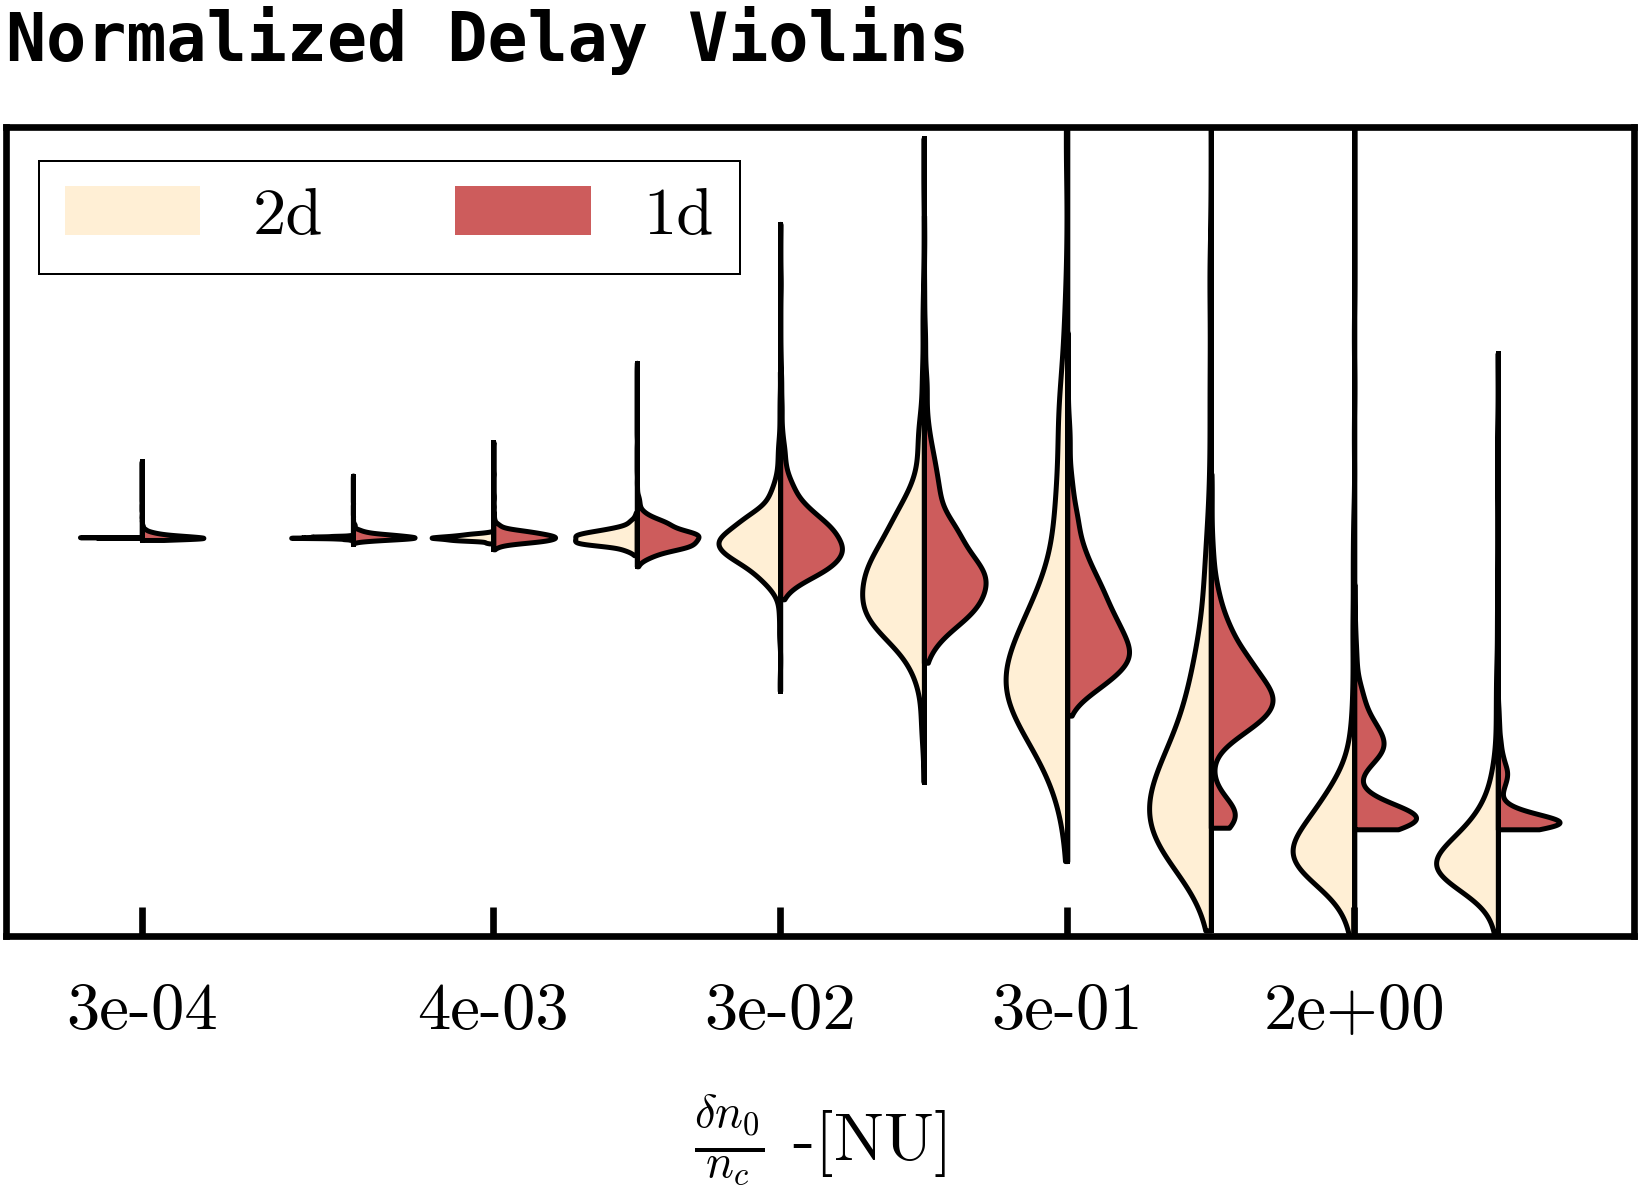

In [18]:
W = 3.5    # Figure width in inches, approximately A4-width - 2*1.27in margin
fig, ax = plt.subplots(1, figsize = (W, W * 2 / 4), dpi = 600)

violins = ax.violinplot(np.array(delay_list_4)[index_2][::10].real.T,positions=np.log(amplitude_4)[index_2][::10], showmeans=False, showmedians=False, widths=0.9,side = 'low', points=1000)
violins2 = ax.violinplot(np.array(delay).real.T,positions= np.array(np.log(amp)), showmeans=False, showmedians=False, widths=0.9,side = 'high', points = 1000)

ax.set_xticks(np.log(amplitude_4)[index_2][::20])
ax.set_xticklabels([f'{r:.0e}' for r in amplitude_4[index_2][::20]], fontsize = 8)
ax.set_xlabel('$\\frac{\delta n_0}{n_c}$ -[NU]')
ax.set_yticks([])
ax.set_title("Normalized Delay Violins", loc='left', fontweight='bold', family='monospace',)
for pc,pc2 in zip(violins['bodies'], violins2['bodies']):

    pc2.set_color('indianred')
    pc2.set_edgecolor('k')
    pc2.set_linewidth(.6)
    pc2.set_alpha(1)

    pc.set_color('papayawhip')
    pc.set_edgecolor('k')
    pc.set_linewidth(.6)
    pc.set_alpha(1)

labels = []
def add_label(violin, label):
    color = violin["bodies"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))
add_label(violins, '2d')
add_label(violins2, '1d')

violins2['cbars'].set_linewidth(.6)
violins['cbars'].set_linewidth(.6)

violins['cbars'].set_color('k')
violins2['cbars'].set_color('k')

violins['cmaxes'].set_linewidth(0)
violins['cmins'].set_linewidth(0)
violins2['cmaxes'].set_linewidth(0)
violins2['cmins'].set_linewidth(0)
ax.set_ylim(2.8e-9, 6e-9)
ax.legend(*zip(*labels), fontsize = 8, ncols = 2, loc = 'upper left')
plt.savefig('../../Report/figures/delay_overview.pdf', dpi = 600, bbox_inches = 'tight')

### Delay Study

In [53]:
from matplotlib.markers import MarkerStyle

In [54]:
nc2 = 3e10 /(2 * np.pi * 50e9 * np.sqrt(1 * 10 * np.log(10)))

In [55]:
rms_n, rms_td = np.load('./extract_data/1d.npy')

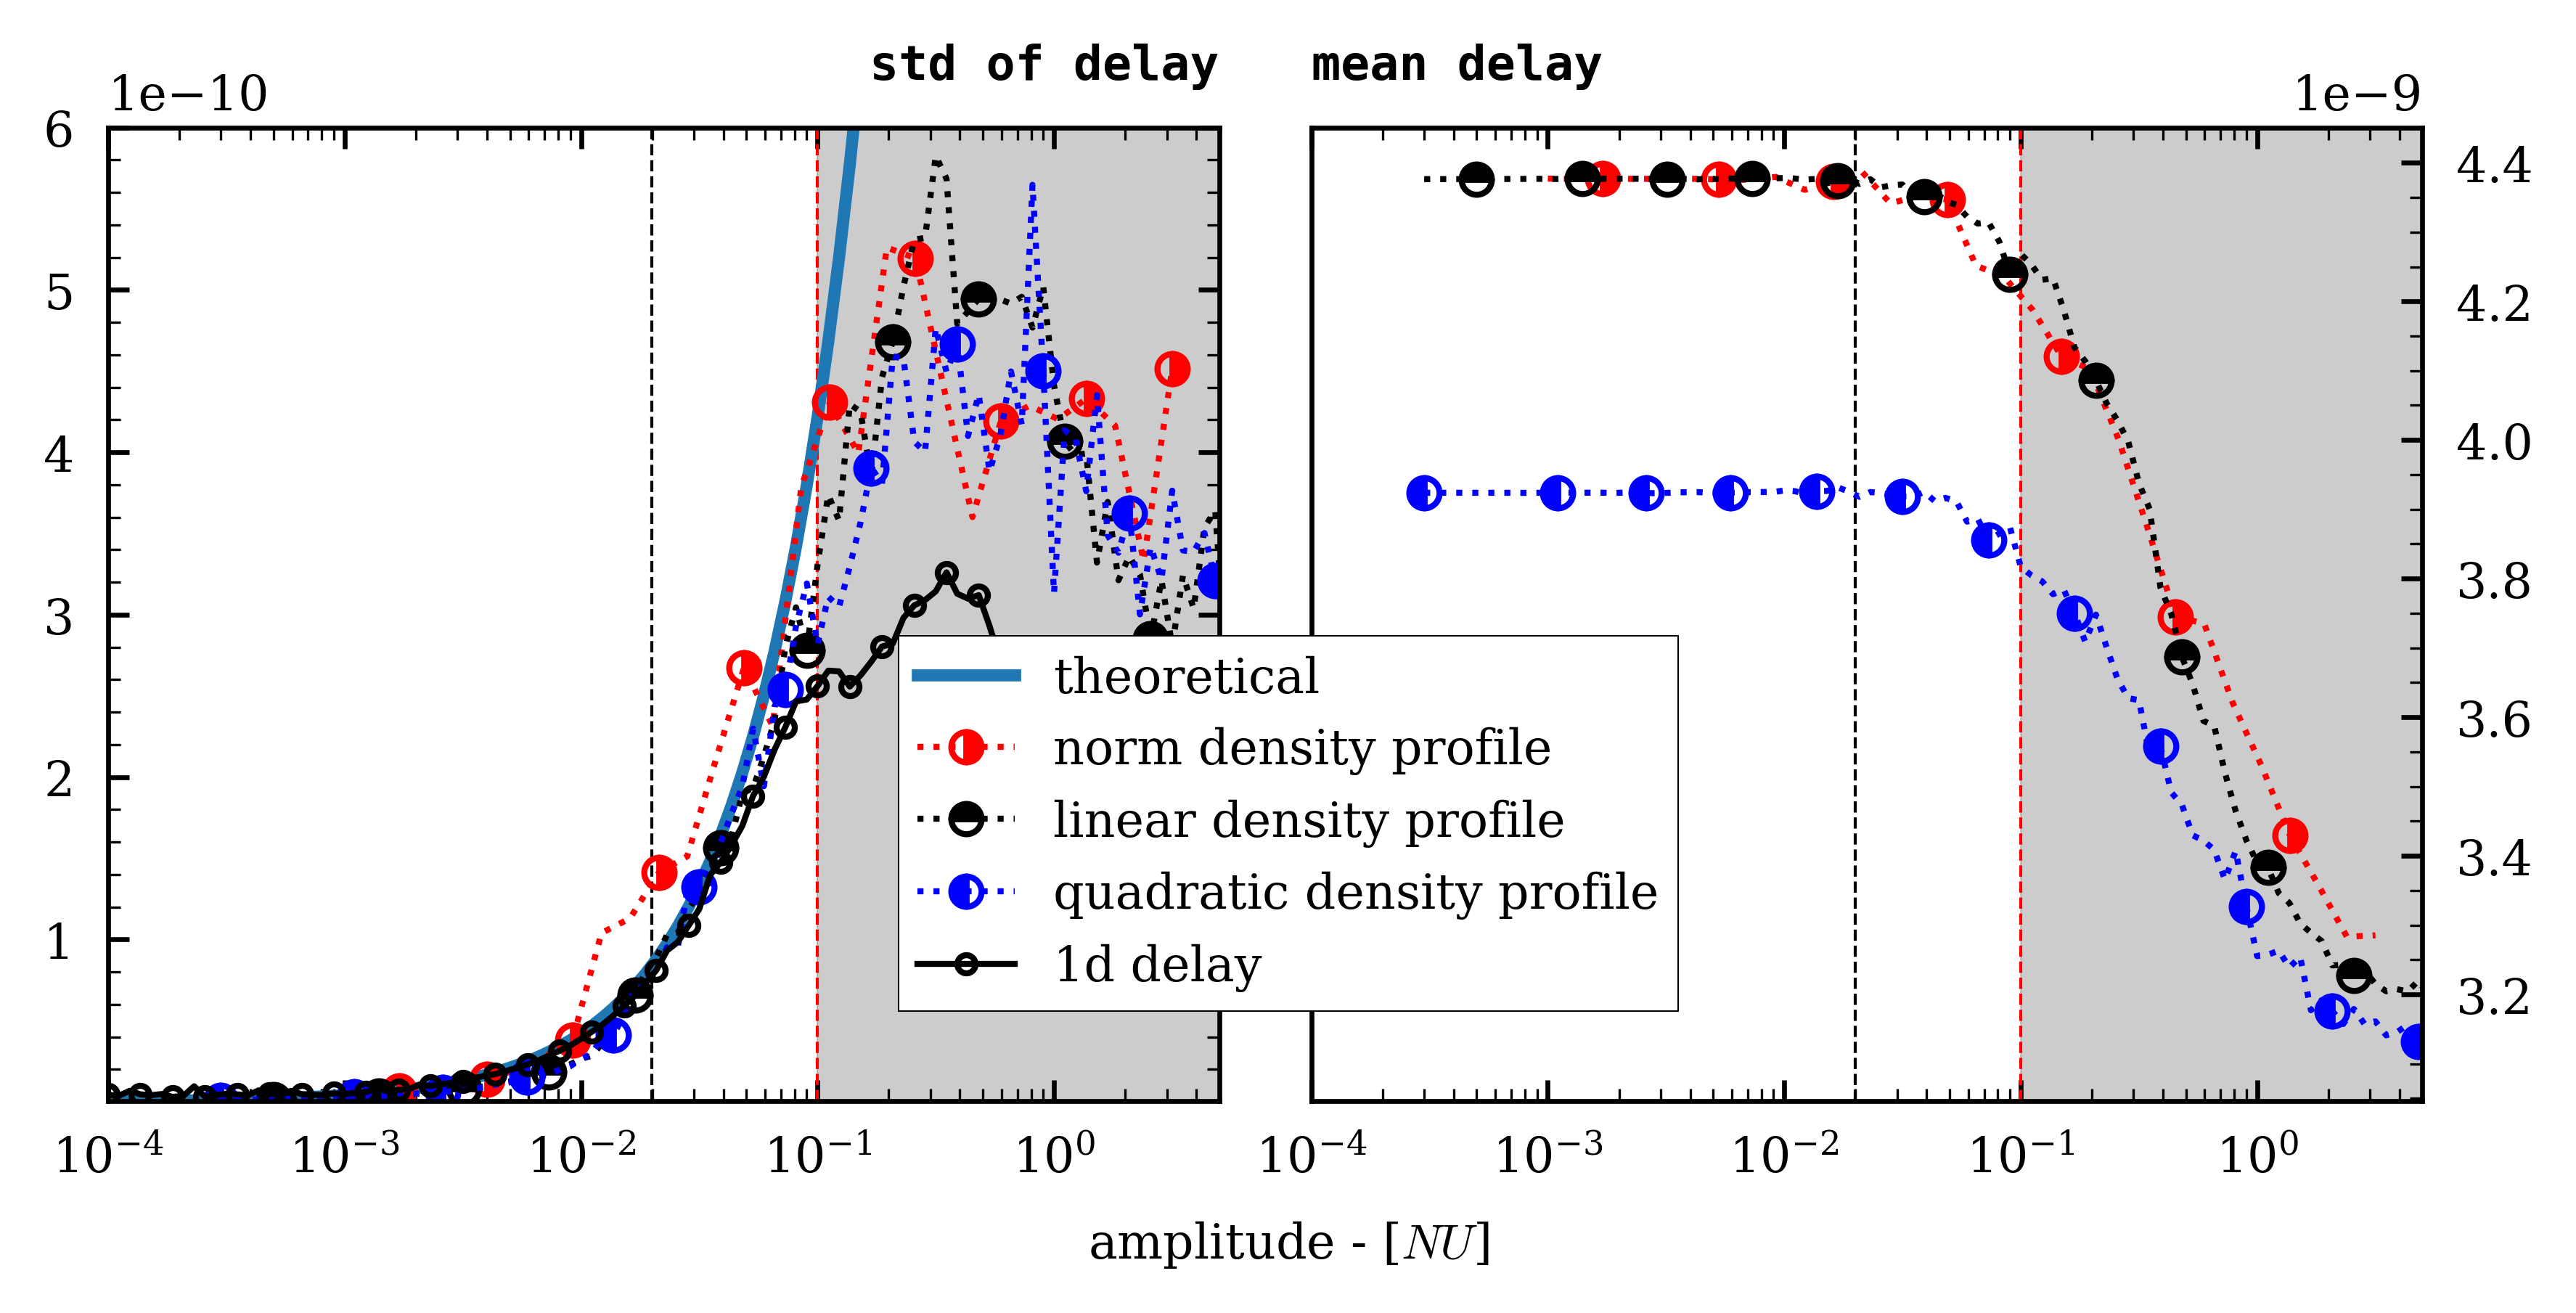

In [112]:
W = 5.8
fig, ax = plt.subplots(1,2, figsize = (W, W * 2/4))
ax[0].set_title('std of delay',     fontweight='bold',loc = 'right',
    family='monospace',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].plot(rms_n,2 *  dt_theo  , label='theoretical', ls = '-', lw  = 2)

ax[0].plot(amplitude_norm[index], np.std(delay_list_norm, axis = 1)[index], marker =MarkerStyle("o", fillstyle="right"), label = 'norm density profile', lw = 1, markevery = (2, 3), ms = 5, color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], np.std(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density profile', lw = 1, markevery = (2,8), ms = 5, color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], np.std(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quadratic density profile', lw = 1, markevery = 8, ms = 5, color = 'b', ls = ':')

ax[0].plot(rms_n, rms_td, label = '1d delay', lw = 1,  marker ='o', mfc = 'none', color = 'k', markevery = 3, ms = 3, ls = '-'  )

ax[0].set_xlim(1e-4, 5)

ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
# ax[0].set_yscale('log')
ax[0].set_ylim(0.5e-12, 6e-10)
ax[1].set_title('mean delay',    fontweight='bold',loc = 'left',
    family='monospace',)


ax[1].set_xscale('log')
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

ax[1].plot(amplitude_norm[index], np.mean(delay_list_norm, axis = 1)[index], marker =MarkerStyle("o", fillstyle="right"),  lw = 1, markevery = (2, 4), ms = 5, color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], np.mean(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), lw = 1, markevery = (2,8), ms = 5, color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], np.mean(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), lw = 1, markevery = 8, ms = 5, color = 'b', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
# ax[1].se_)yscale('log')
# ax[1].legend(loc = 'lower left')
ax[1].set_xlim(1e-4, 5)
fig.legend(loc = 'lower center', bbox_to_anchor = (0.5, 0.2))
fig.supxlabel("amplitude - [$NU$]", fontsize = 8)

plt.savefig('../../Report/figures/delay_amp_norm_2.png', dpi = 500)

In [56]:

FWHM =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_norm]
FWHM_2 =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_4]
FWHM_3 =  [np.mean([delay_dispersion(np.arange(0, 2893) * dt, pulse) for pulse in pulse_group]) for pulse_group in pulse_quad]


### Studying the mean of the variable

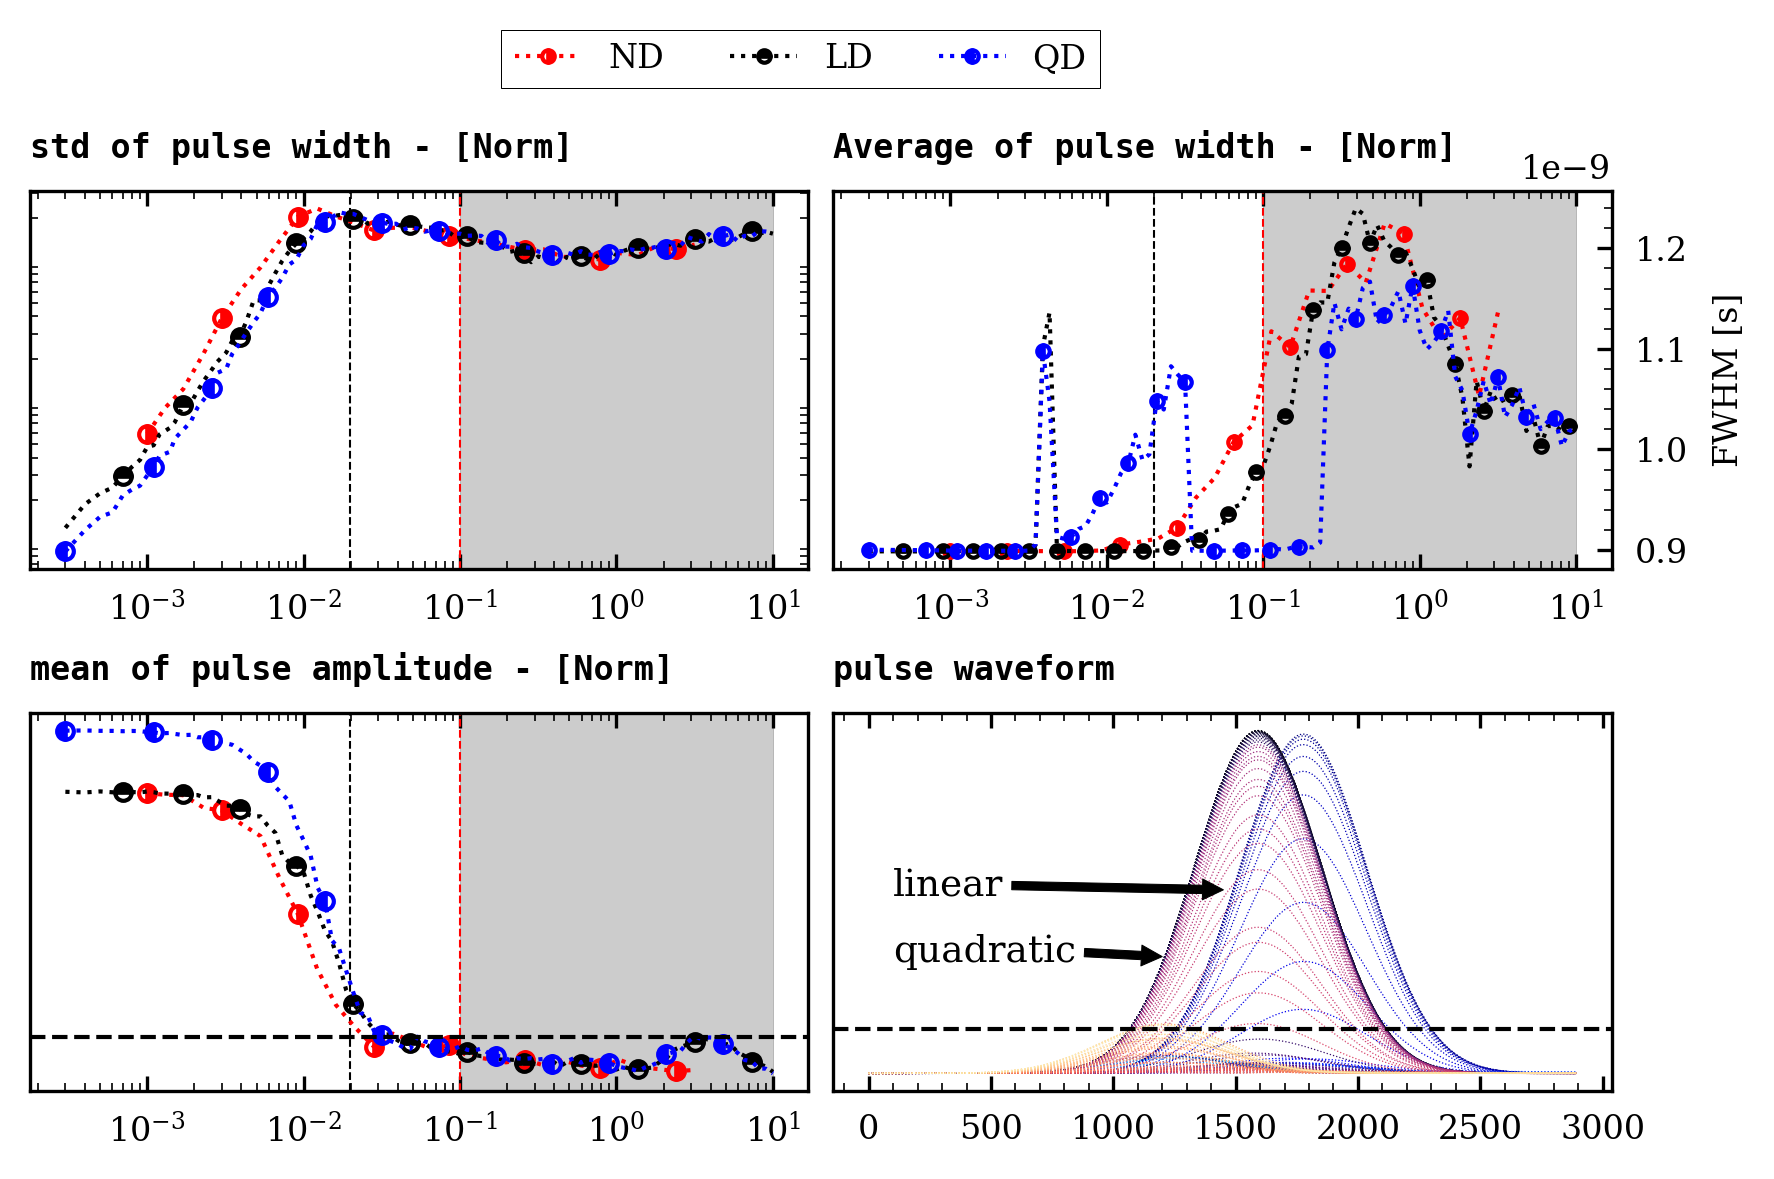

In [49]:
W = 5.8
fig, ax = plt.subplots(2, 2, figsize = (W, W * 3/5), dpi = 300)
ax = ax.flatten()
ax[0].set_title('std of pulse width - [Norm]', fontweight='bold',loc = 'left',
    family='monospace',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[0].plot(amplitude_norm[index], np.std(amp, axis = 1)[index], marker = MarkerStyle("o", fillstyle="right"),  lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], np.std(amp_2, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), lw = 1, markevery = (4,8), ms = 4, color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], np.std(amp_3, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"),  lw = 1, markevery = 8, ms = 4,   color = 'b', ls = ':')

ax[0].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_yticks([])

ax[1].set_title('Average of pulse width - [Norm]',    fontweight='bold',loc = 'left',
    family='monospace',)


ax[1].set_xscale('log')
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].yaxis.set_label_position("right")

ax[1].plot(amplitude_norm[index],FWHM, marker = MarkerStyle("o", fillstyle="right"), label = 'ND', lw = 1, markevery = 3, ms = 3,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], FWHM_2 , marker =MarkerStyle("o", fillstyle="top"), label = 'LD', lw = 1, markevery = (2,4), ms = 3,   color = 'k', ls = ':')
ax[1].plot(amplitude_4[index_2], FWHM_3 , marker =MarkerStyle("o", fillstyle="left"), label = 'QD', lw = 1, markevery = 4, ms = 3,   color = 'b', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[1].set_ylabel('FWHM [s]')
# ax[1].legend(loc = 'lower left')
ax[1].yaxis.tick_right()
mean_pulse = np.max(pulse_norm, axis = 2)
mean_pulse_2 = np.max(pulse_4, axis = 2)
mean_pulse_3 = np.max(pulse_quad, axis = 2)

ax[2].set_title('mean of pulse amplitude - [Norm]',    fontweight='bold',loc = 'left',
    family='monospace',)
ax[2].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[2].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[2].plot(amplitude_norm[index], np.mean(mean_pulse, axis = 1)[index], marker = MarkerStyle("o", fillstyle="right"), lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[2].plot(amplitude_4[index_2], np.mean(mean_pulse_2, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"),  lw = 1, markevery = (4,8), ms = 4,   color = 'k', ls = ':')
ax[2].plot(amplitude_quad[index_3], np.mean(mean_pulse_3, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), lw = 1, markevery = 8, ms = 4,   color = 'b', ls = ':')

ax[2].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[2].set_xscale('log')
ax[2].set_yticks([])
ax[2].axhline(450, color = 'k', ls = '--', lw = 1)


ax[3].set_title('pulse waveform',    fontweight='bold',loc = 'left',
    family='monospace',)

ax[3].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 100)))
ax[3].plot(abs(np.mean(pulse_norm, axis = 1).T), lw = .3, ls = ':')

ax[3].set_prop_cycle(color=plt.cm.magma(np.linspace(0, 1, 100)))
ax[3].plot(abs(np.mean(pulse_quad, axis = 1).T), lw = .3,  ls = ':')

ax[3].set_yticks([])

ax[3].axhline(400, color = 'k', ls = '--', lw = 1)
ax[3].annotate("quadratic", xy=(1200, 1050), xytext=(100, 1000),
             arrowprops=dict(facecolor='black', width = 2, headwidth  = 5, headlength = 5), color = 'k', fontsize = 9)
ax[3].annotate("linear", xy=(1450, 1650), xytext=(100, 1600),
             arrowprops=dict(facecolor='black', width = 2, headwidth  = 5, headlength = 5), color = 'k', fontsize = 9)
fig.legend(loc = 'upper center', bbox_to_anchor = (0.45, 1.1), ncol = 3)
fig.savefig('../../Report/figures/pulse_params.png', dpi = 500, bbox_inches='tight')

### Skewness study

In [57]:
def window_around_max(pulse, window_size = 2000) :

    a =[]
    for i in range(pulse.shape[0]) :
        b = []
        for j in range(pulse.shape[1]) :
            window = pulse[i, j, np.argmax(pulse[i, j]) - window_size // 2 : np.argmax(pulse[i, j]) + window_size //2]
            if window.shape[0] < window_size :
                pad = window_size - window.shape[0]
                window =  pulse[i, j, np.argmax(pulse[i, j]) - window_size // 2 - pad: np.argmax(pulse[i, j]) + window_size //2]
            b.append(window)
        a.append(b)
    return np.array(a)

<>:48: SyntaxWarning: invalid escape sequence '\d'
<>:48: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_22500/295695072.py:48: SyntaxWarning: invalid escape sequence '\d'
  fig.text(0.97, 0.93, s = '$\delta_n$', ha = 'center')


/tmp/ipykernel_22500/295695072.py:48: SyntaxWarning: invalid escape sequence '\d'
  fig.text(0.97, 0.93, s = '$\delta_n$', ha = 'center')


FileNotFoundError: [Errno 2] No such file or directory

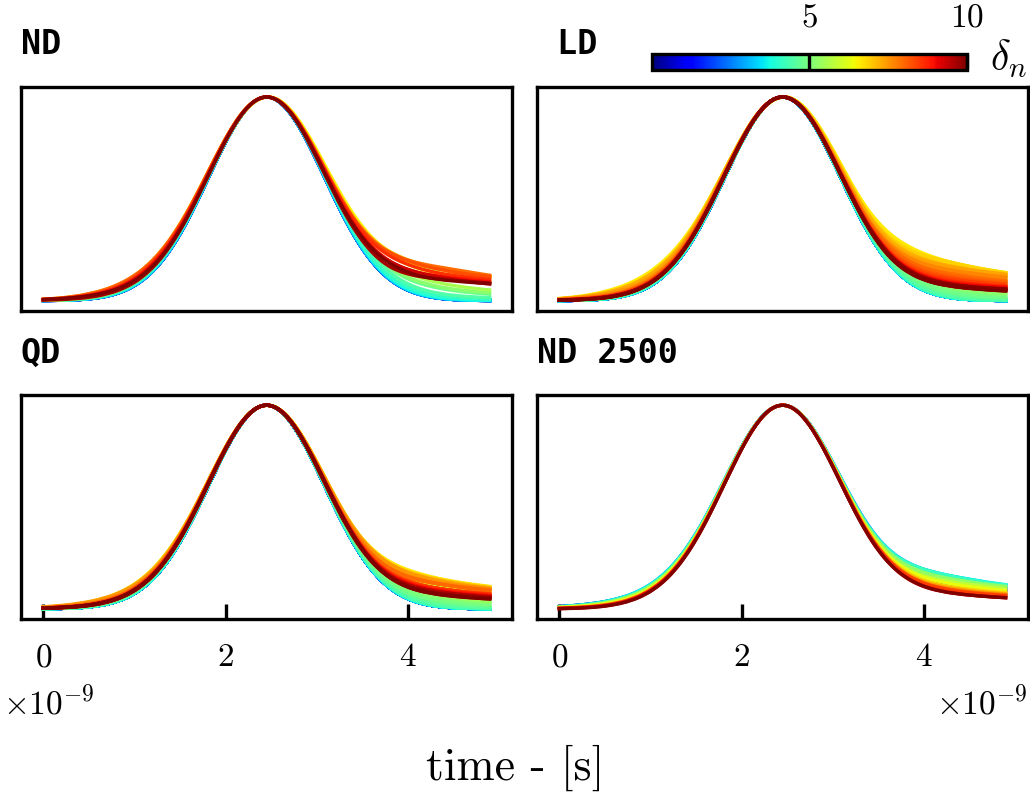

In [35]:
W = 3.5
fig, ax = plt.subplots(2, 2, figsize = (W, W * 3/ 4), dpi = 300, layout = 'constrained')
ax = ax.flatten()
ax[0].set_title('ND',     fontweight='bold',loc = 'left',
    family='monospace',)
ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 30)))
mean_pulse = np.mean(window_around_max(abs(pulse_norm[index])), axis = 1)
ax[0].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .8)
ax[0].yaxis.set_visible(False)
ax[0].xaxis.set_visible(False)

ax[1].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 96)))
mean_pulse = np.mean(window_around_max(abs(pulse_4[index_2])), axis = 1)
ax[1].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .8)
ax[1].set_title(' LD',  fontweight='bold',loc = 'left',
    family='monospace',)
ax[1].yaxis.set_visible(False)
ax[1].xaxis.set_visible(False)

ax[2].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 96)))
mean_pulse = np.mean(window_around_max(abs(pulse_quad[index_3])), axis = 1)
ax[2].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .8)
ax[2].set_title('QD',   fontweight='bold',loc = 'left',
    family='monospace',)
ax[2].yaxis.set_visible(False)

ax[3].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 20)))
mean_pulse = np.mean(window_around_max(abs(pulse_norm_2[index_4])), axis = 1)
ax[3].plot(np.arange(len(mean_pulse.T)) * dt,(mean_pulse.T/ np.max(mean_pulse, axis = 1)), lw = .8)
ax[3].set_title('ND 2500' , fontweight='bold',loc = 'left',
    family='monospace',)
ax[3].yaxis.set_visible(False)
for i,axe in enumerate(ax) :
    axe.tick_params(axis='x', labelsize=8)
    t = axe.xaxis.get_offset_text()
    t.set_size(8)
    if i == 2 : t.set_position((0.15,0))


# Define your mappable for colorbar creation
sm = plt.cm.ScalarMappable(cmap='jet',
                           norm=plt.Normalize(vmin=amplitude_4.min(),
                                              vmax=amplitude_4.max()))
cax = fig.add_axes([0.63, 0.93, .3, 0.02])
fig.colorbar(sm, cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position('top') # the rest is the same

fig.text(0.97, 0.93, s = '$\delta_n$', ha = 'center')
fig.supxlabel('time - [s]', fontsize = 11)
plt.savefig('../../Report/figures/pulse_shape.png', dpi = 500)

In [58]:
from scipy.stats import skew

In [59]:
def compute_area_left_right(signal) :
    left= np.trapz(signal[:signal.shape[0]//2])
    right = np.trapz(signal[signal.shape[0]//2:])
    return right / left

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_33955/1676424061.py:3: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_title('$\mu^3$ of delay',  fontweight='bold',loc = 'left',
/tmp/ipykernel_33955/1549447515.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  left= np.trapz(signal[:signal.shape[0]//2])
/tmp/ipykernel_33955/1549447515.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  right = np.trapz(signal[signal.shape[0]//2:])


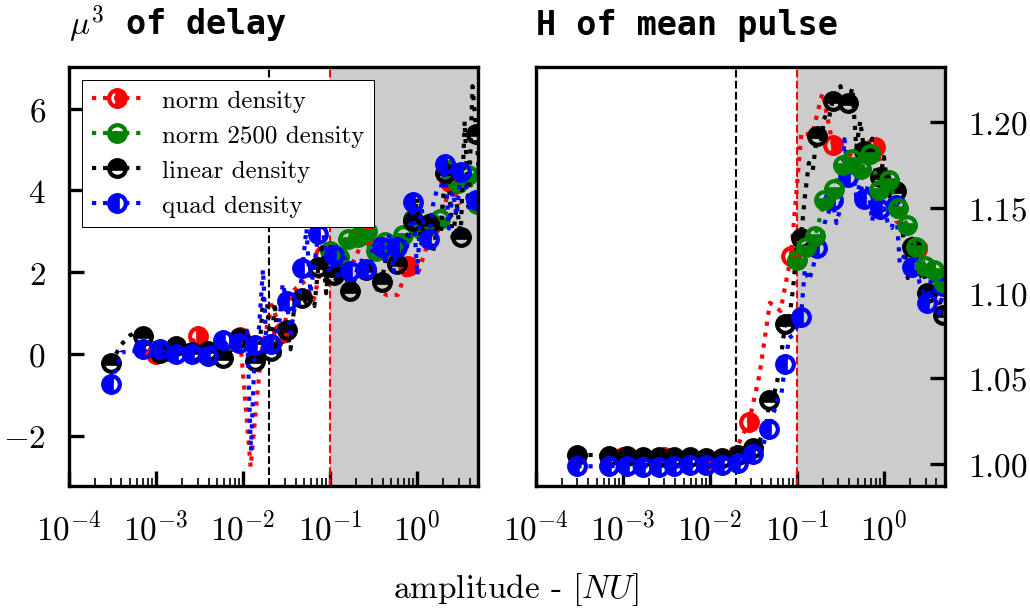

In [131]:
W = 3.5
fig, ax = plt.subplots(1, 2, figsize = (W, W * 3/ 5), dpi = 300, layout = 'constrained')
ax[0].set_title('$\mu^3$ of delay',  fontweight='bold',loc = 'left',
    family='monospace',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[0].plot(amplitude_norm[index], skew(delay_list_norm, axis = 1)[index], marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[0].plot(amplitude_norm_2[index_4], skew(delay_list_norm_2, axis = 1)[index_4], marker = MarkerStyle("o", fillstyle="bottom"), label = 'norm 2500 density', lw = 1, markevery = 1, ms = 4,   color = 'g', ls = ':')

ax[0].plot(amplitude_4[index_2], skew(delay_list_4, axis = 1)[index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'linear density', lw = 1, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], skew(delay_list_quad, axis = 1)[index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 1, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[0].set_xlim(1e-4, 5)
ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].legend(loc = 'upper left', fontsize = 6)
ax[1].set_title('H of mean pulse',  fontweight='bold',loc = 'left',
    family='monospace',)

ax[1].set_xscale('log')

ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].yaxis.set_label_position("right")

mean_pulse = np.mean(window_around_max(abs(pulse_norm)), axis = 1)[index]
mean_pulse_2 = np.mean(window_around_max(abs(pulse_4)), axis = 1)[index_2]

mean_pulse_3 = np.mean(window_around_max(abs(pulse_quad)), axis = 1)[index_3]
mean_pulse_4 = np.mean(window_around_max(abs(pulse_norm_2)), axis = 1)[index_4]

ax[1].plot(amplitude_norm[index],[compute_area_left_right(pulse) for pulse in mean_pulse],  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 1, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], [compute_area_left_right(pulse) for pulse in mean_pulse_2], marker = MarkerStyle("o", fillstyle="top"), label = 'norm density 2500', lw = 1, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], [compute_area_left_right(pulse) for pulse in mean_pulse_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 1, markevery = 4, ms = 4,   color = 'b', ls = ':')
ax[1].plot(amplitude_norm_2[index_4],[compute_area_left_right(pulse) for pulse in mean_pulse_4], marker = MarkerStyle("o", fillstyle="bottom"), label = 'norm density', lw = 1, markevery = 1, ms = 4,   color = 'g', ls = ':')

ax[1].axvspan(0.1, 10, alpha = 0.2, color = 'k')
ax[1].set_xlim(1e-4, 5)
ax[1].yaxis.tick_right()
fig.supxlabel("amplitude - [$NU$]", fontsize = 8)
fig.savefig('../../Report/figures/skew_Hyst.png', dpi = 600, bbox_inches='tight')

GAUSSIAN FIT

In [87]:
from scipy.optimize import curve_fit

def gaussian(x, a : float, b: float,  c : float) :
    return a * np.exp(- (b - x) ** 2 /(2 * c ** 2))

cf = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_2 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_4, axis = 1))])
cf_3 = np.array([curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500], )[0] for pulse in abs(np.mean(pulse_quad, axis = 1))])

In [93]:
cf.shape

(30, 3)

<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_33955/1631571163.py:30: SyntaxWarning: invalid escape sequence '\d'
  cax.set_ylabel('$\delta_n$', labelpad=-1.6)


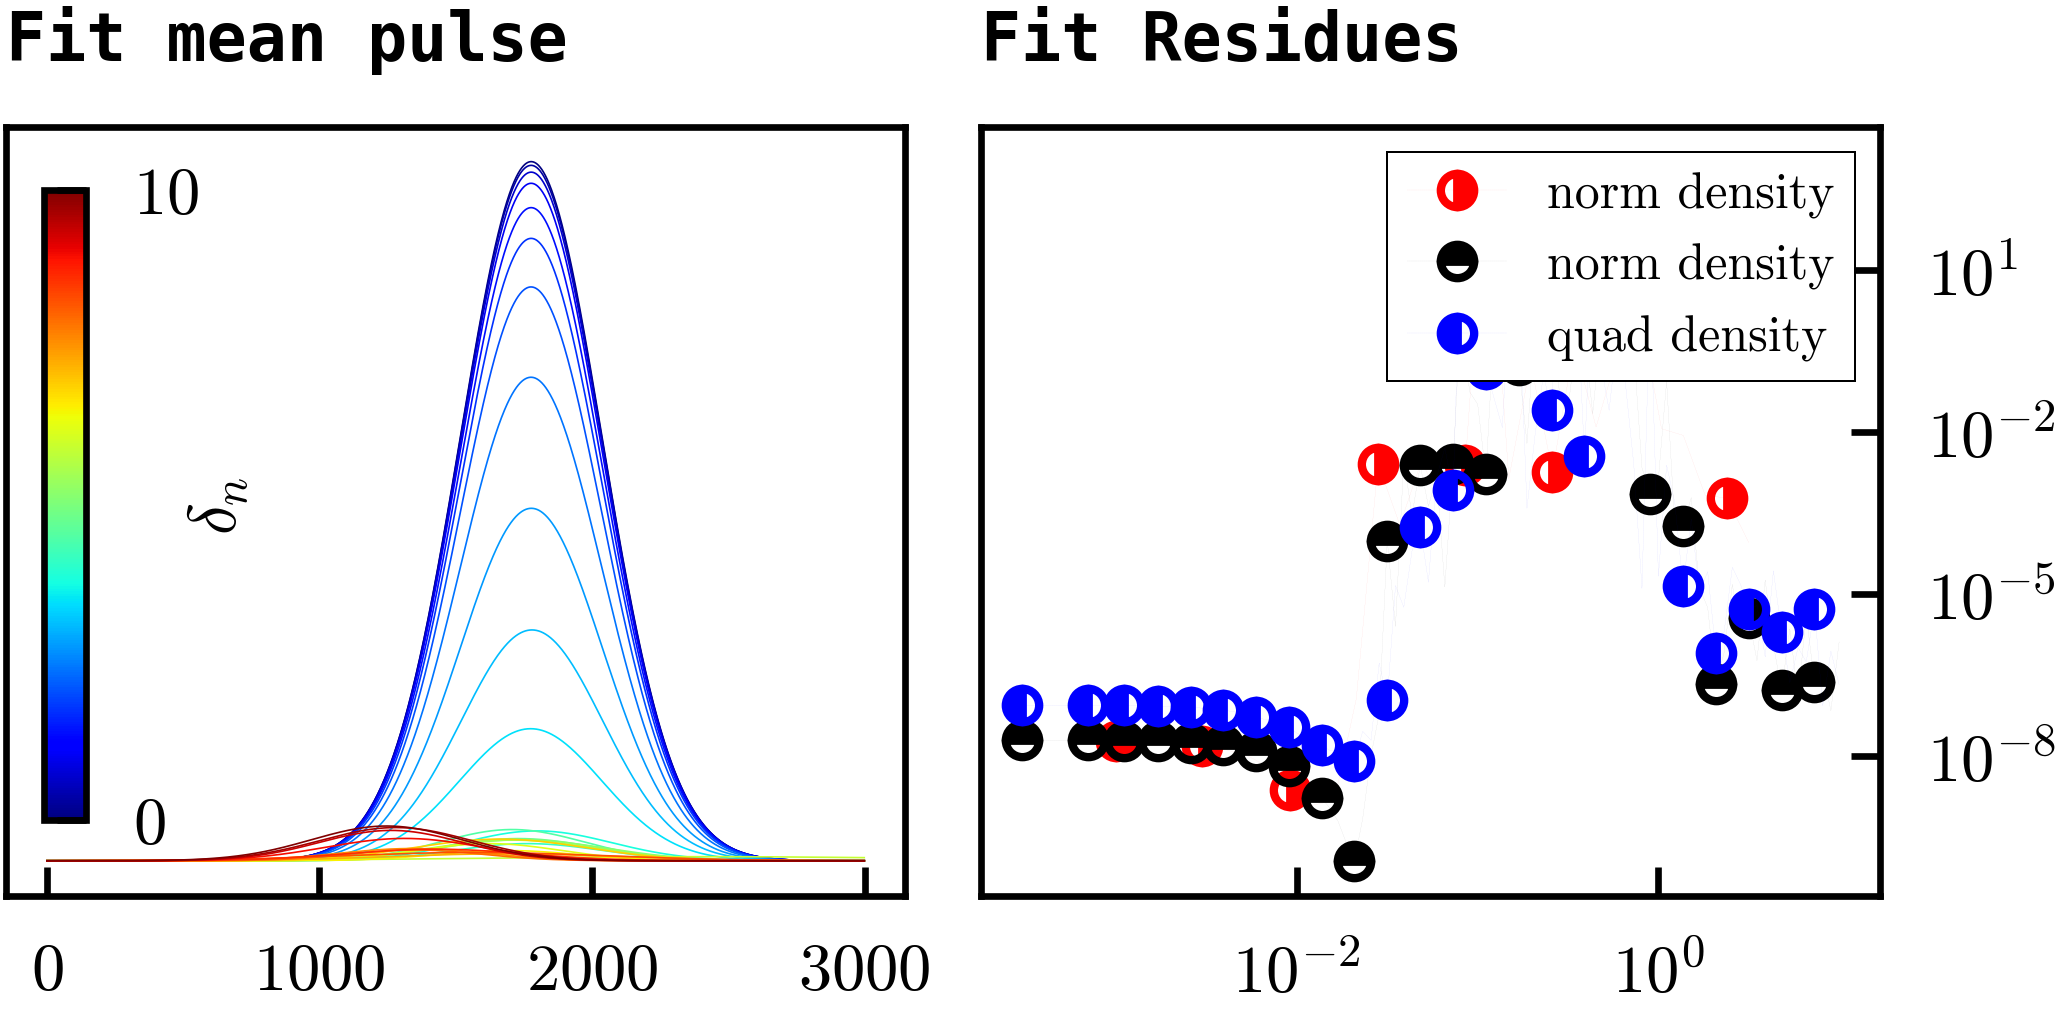

In [122]:
W = 3.5
fig, ax = plt.subplots(1,2, figsize = (W, W * 2/4), dpi = 600, layout = 'constrained')
cf_cov = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_norm, axis = 1))])
cf_cov_2 = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_4, axis = 1))])
cf_cov_3 = np.array([np.sum(np.diag(curve_fit(gaussian, range(len(pulse)), pulse, p0 = [300, 1500, 500])[1]) ** 2) for pulse in abs(np.mean(pulse_quad, axis = 1))])

ax[0].set_prop_cycle(color=plt.cm.jet(np.linspace(0, 1, 30)))
ax[0].plot(np.array([gaussian(np.arange(3000), *p_opt) for p_opt in cf]).T, lw = .2)
ax[0].set_title('Fit mean pulse ', fontweight='bold',loc = 'left',
    family='monospace',)
ax[0].set_yticks([])


ax[1].plot(amplitude_norm[index],cf_cov[index] / cf[:,0][index],  marker = MarkerStyle("o", fillstyle="right"), label = 'norm density', lw = 0.01, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], cf_cov_2[index_2] / cf_2[:,0][index_2], marker = MarkerStyle("o", fillstyle="top"), label = 'norm density', lw = 0.01, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], cf_cov_3[index_3] / cf_3[:,0][index_3], marker = MarkerStyle("o", fillstyle="left"), label = 'quad density', lw = 0.01, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title('Fit Residues',  fontweight='bold',loc = 'left',
    family='monospace',)
ax[1].yaxis.tick_right()
ax[1].legend(fontsize = 6)
sm = plt.cm.ScalarMappable(cmap='jet',
                           norm=plt.Normalize(vmin=amplitude_4.min(),
                                              vmax=amplitude_4.max()))
cax = fig.add_axes([0.03, 0.2, .02, 0.6])
fig.colorbar(sm, cax=cax, orientation='vertical')
cax.set_yticks([amplitude_4.min(), amplitude_4.max()])
cax.set_ylabel('$\delta_n$', labelpad=-1.6)
fig.savefig('../../Report/figures/gaussian_fit.png', dpi = 600, bbox_inches='tight')

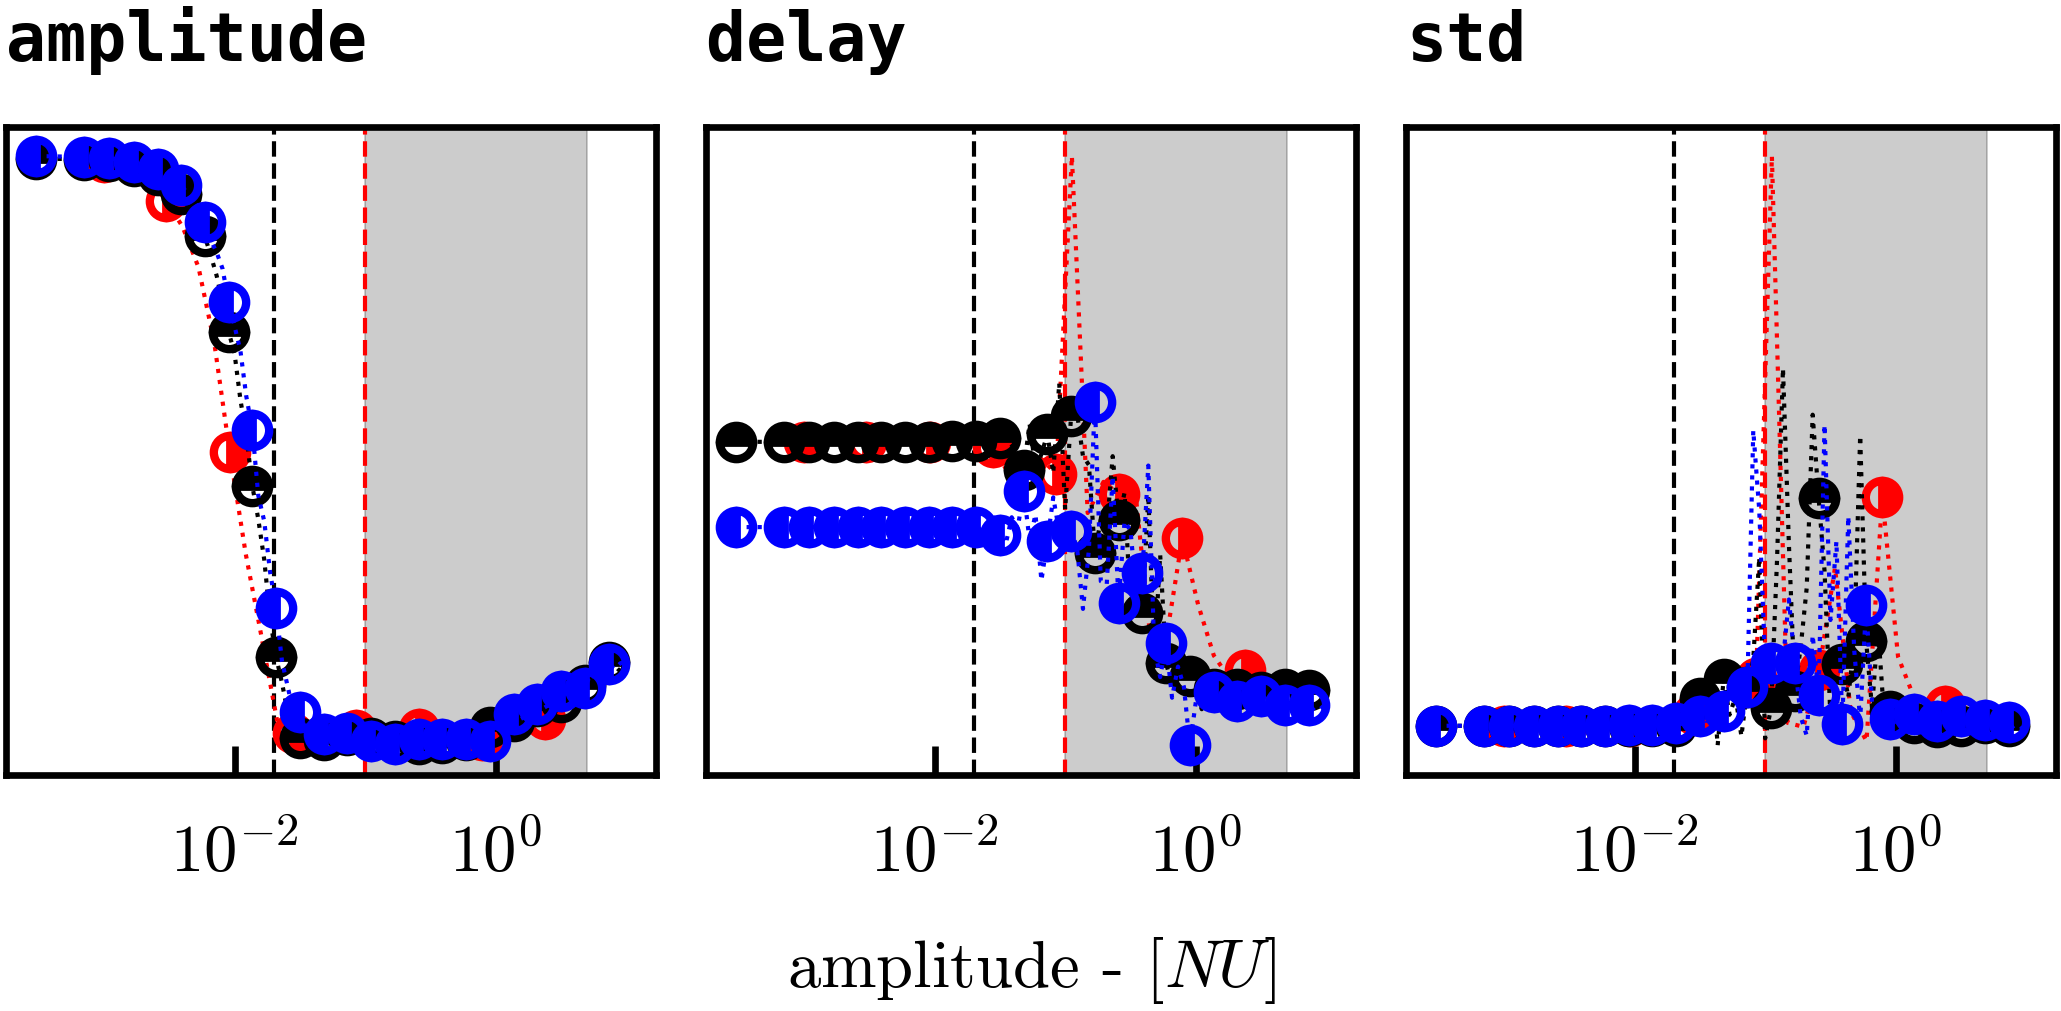

In [128]:
W = 3.5
fig, ax = plt.subplots(1,3, figsize = (W, W * 3/6), layout = 'constrained', dpi = 600)

ax[0].set_title('amplitude ',   fontweight='bold',loc = 'left',
    family='monospace',)
ax[0].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[0].axvline(nc2, color = 'k', ls = '--', lw = .5)

ax[0].plot(amplitude_norm[index],cf[:,0][index] ,  marker = MarkerStyle("o", fillstyle="right"), label = 'ND', lw = 0.5, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[0].plot(amplitude_4[index_2], cf_2[:,0][index_2] , marker = MarkerStyle("o", fillstyle="top"), label = 'LD', lw = 0.5, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[0].plot(amplitude_quad[index_3], cf_3[:,0][index_3] , marker = MarkerStyle("o", fillstyle="left"), label = 'QD', lw = 0.5, markevery = 4, ms = 4,   color = 'b', ls = ':')

ax[0].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[0].set_xscale('log')
ax[0].set_yticks([])

ax[1].set_title('delay ',   fontweight='bold',loc = 'left',
    family='monospace',)
ax[1].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[1].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[1].plot(amplitude_norm[index],cf[:,1][index] ,  marker = MarkerStyle("o", fillstyle="right"), lw = 0.5, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[1].plot(amplitude_4[index_2], cf_2[:,1][index_2] , marker = MarkerStyle("o", fillstyle="top"), lw = 0.5, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[1].plot(amplitude_quad[index_3], cf_3[:,1][index_3] , marker = MarkerStyle("o", fillstyle="left"), lw = 0.5, markevery = 4, ms = 4,   color = 'b', ls = ':')
ax[1].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[1].set_xscale('log')
ax[1].set_yticks([])

ax[2].set_title('std',  fontweight='bold',loc = 'left',
    family='monospace',)
ax[2].axvline(0.1, color = 'r', ls = '--', lw = .5)
ax[2].axvline(nc2, color = 'k', ls = '--', lw = .5)
ax[2].plot(amplitude_norm[index],cf[:,2][index] ,  marker = MarkerStyle("o", fillstyle="right"), lw = 0.5, markevery = 4, ms = 4,   color = 'r', ls = ':')
ax[2].plot(amplitude_4[index_2], cf_2[:,2][index_2] , marker = MarkerStyle("o", fillstyle="top"), lw = 0.5, markevery = 4, ms = 4,   color = 'k', ls = ':')
ax[2].plot(amplitude_quad[index_3], cf_3[:,2][index_3] , marker = MarkerStyle("o", fillstyle="left"), lw = 0.5, markevery = 4, ms = 4,   color = 'b', ls = ':')
ax[2].axvspan(0.1, 5, alpha = 0.2, color = 'k')
ax[2].set_xscale('log')
ax[2].set_yticks([])
fig.supxlabel("amplitude - [$NU$]", fontsize = 8)
# fig.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 3)
fig.savefig('../../Report/figures/gaussian_Params.pdf', dpi = 600, bbox_inches='tight')


In [ ]:
from scipy.signal import find_peaks

In [ ]:
peaks_prop = {'num_spikes' : [], 'peak_widths' : [], 'peak_height' : []}
for i,amp in enumerate(amplitude_norm) :
    num_spikes = []
    for sample in pulse_norm[i] :
        peaks, _ = find_peaks(sample,  height = 200, distance = 100, width=100)
        num_spikes.append(len(peaks))

    peaks_prop['num_spikes'].append(num_spikes)
    peaks_prop['peak_widths'].append(_['widths'])
    peaks_prop['peak_height'].append(_['peak_heights'])

In [ ]:
peaks_prop['peak_widths'] = [peaks_prop['peak_widths'][i] if len(peaks_prop['peak_widths'][i]) > 0 else [0] for i in range(len(peaks_prop['peak_widths']))]
peaks_prop['peak_height'] = [peaks_prop['peak_height'][i] if len(peaks_prop['peak_height'][i]) > 0 else [0] for i in range(len(peaks_prop['peak_height']))]

Text(0.5, 0, 'amplitude')

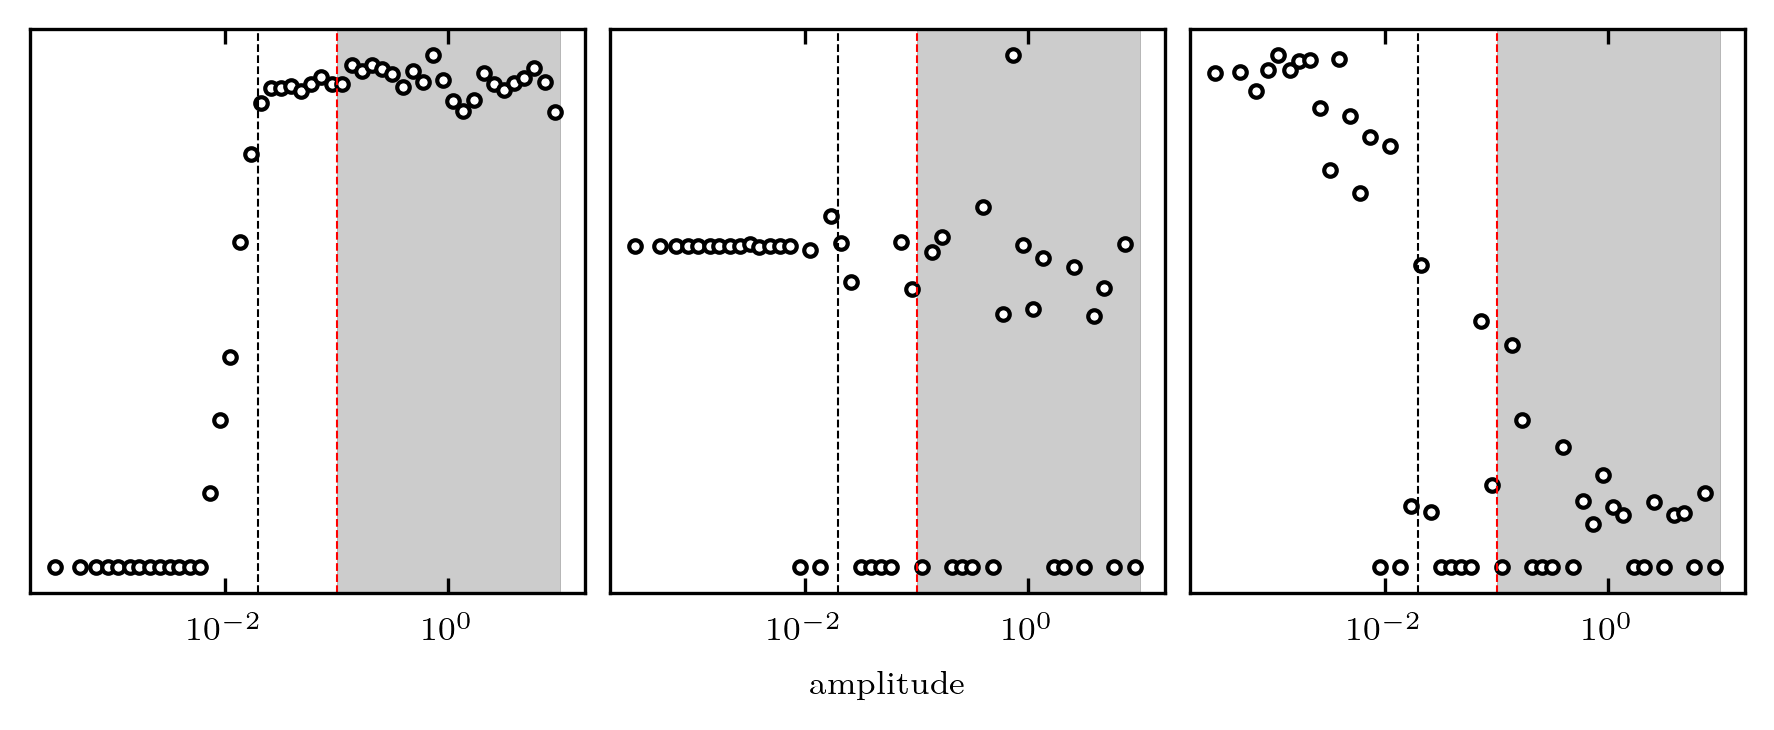

In [ ]:
W = 5.8
fig, ax = plt.subplots(1,3, figsize = (W, W * 2/ 5), dpi = 300)
ax[0].plot(amplitude_norm[index], np.std(peaks_prop['num_spikes'], axis = 1)[index],  marker = 'o', label = 'mean delay', lw = 0, markevery = 2, ms = 3,   color = 'k')
ax[1].plot(amplitude_norm[index], np.max(peaks_prop['peak_widths'], axis = 1)[index], marker = 'o', label = 'max delay', lw = 0, markevery = 2, ms = 3,   color = 'k')
ax[2].plot(amplitude_norm[index], np.max(peaks_prop['peak_height'], axis = 1)[index], marker = 'o', label = 'mean delay', lw = 0, markevery = 2, ms = 3,   color = 'k')

for ax_ in ax :
    ax_.set_xscale('log')
    ax_.axvline(0.1, color = 'r', ls = '--', lw = .5)
    ax_.axvline(nc2, color = 'k', ls = '--', lw = .5)
    ax_.axvspan(0.1, 10, alpha = 0.2, color = 'k')
    ax_.set_yticks([])
ax[1].set_xlabel('amplitude')
